In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import pandas as pd
import networkx as nx
from operator import itemgetter
from itertools import combinations
import re
import pprint
import community
import collections
from igraph import *
from math import *
import sys
import numpy as np
import os
import glob
import random
from random import shuffle
from random import seed
import time
import datetime

In [4]:
file = open("Game_Of_Thrones.txt", "r",encoding="utf8") 

text = file.read()
text = text.replace('\n',' ')
text = text.replace("\'",'')
#text = text.replace("-",' ')
#text = text.lower()
print(text[:70])

  “We should start back,” Gared urged as the woods began to grow dark 


In [5]:
characters=[["Eddard","Ned"],["Robert"],["Jaime","Kingslayer"],["Catelyn","Kat"],["Cersei"],["Daenerys","Dany"],["Jorah"],["Viserys"],
            ["Jon"],["Sansa"],["Arya"],["Robb"],["Bran"],["Theon","Reek"],["Joffrey"],["Sandor","Hound"],["Gregor","Mountain"],["Tyrion","Imp"],["Drogo"],
            ["Petyr","Littlefinger"],["Davos"],["Samwell"],["Stannis"],["Melisandre"],["Jeor","Lord Commander"],["Bronn"],
            ["Varys"],["Shae"],["Margaery"],["Tywin"],["Ygritte"],["Gendry"],["Tormund"],["Brienne"],["Ramsay"],["Gilly"],
            ["Daario"],["Missandei"],["Ellaria"],["Tommen"],["Jaqen"],["Roose","Lord Bolton"],["High Sparrow"],["Pycelle"],
            ["Meryn"],["Hodor"],["Grenn"],["Osha"],["Asha"],["Rickon"],["Janos"],["Lancel"],["Myrcella"],["Rodrik"],["Luwin"],
            ["Irri"],["Doreah"],["Kevan"],["Selmy","Barristan"],["Rast"],["Aemon"],["Pypar","Pyp"],["Edric"],["Othell"],["Loras"],
            ["Beric"],["Podrick"],["Thoros"],["Eddison"],["Selyse"],["Worm"],["Qyburn"],["Olenna"],["Shireen"],["Meera"],
            ["Jojen"],["Yohn"],["Olly"],["Mace"],["Waif"],["Bowen"],["Arianne"],["Doran"],["Tyene"],["Obara"],["Oberyn"]
            ,["Walder"],["Lysa"],["Edmure"],["Hoster"],["Brynden","Blackfish"],["Renly"],["Arryn"],["Benjen"],
            ["Hotah"],["Belwas"],["Pate"],["Mance"],["Donal"],["Lollys"],["Val"],["Styr"],["Arthur"],["Brandon"],["Aerys"],
            ["Craster"],["Dagmer"],["Shagga"],["Dickon"],["Randyl"],["Connington"],["Greatjon"],["Smalljon"],["Lyanna"],
            ["Wun"],["Marillion"],["Osfryd"],["Osmund"],["Osney"],["Qhorin"],["Quentyn"],["Rakharo"],["Rickard"],["Skahaz","Shavepate"],
            ["Syrio"],["Timett"],["Tycho"],["Tytos"],["Mordane"],["Vyman"],["Waymar"]]

print(len(characters))



131


In [6]:
words_list = text.split(' ')

In [7]:
links = []
window =15
window_parts = []
for k in range(0, len(words_list),window):
    text_current = words_list[k:k+window]
    window_parts.append(' '.join(text_current))


for i in range(0,len(characters)):
    for j in range (i+1, len(characters) ):
        count = 0
        for part in window_parts:
            for k in characters[i]:
                for l in characters[j]:
                    if (len(re.findall(k,part)) > 0) and (len(re.findall(l,part)) > 0):
                        count += 1
                    
        edge = []
        edge.append(characters[i][0])
        edge.append(characters[j][0])
        edge.append(count)
        links.append(edge)

In [8]:
char_first=[]
for i in characters:
    char_first.append(i[0])
g = nx.Graph()
g.add_nodes_from(char_first)
for i in links:
    if (i[2]!= 0):
        g.add_edge(i[0],i[1], weight = int(i[2]))
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 131
Number of edges: 498
Average degree:   7.6031


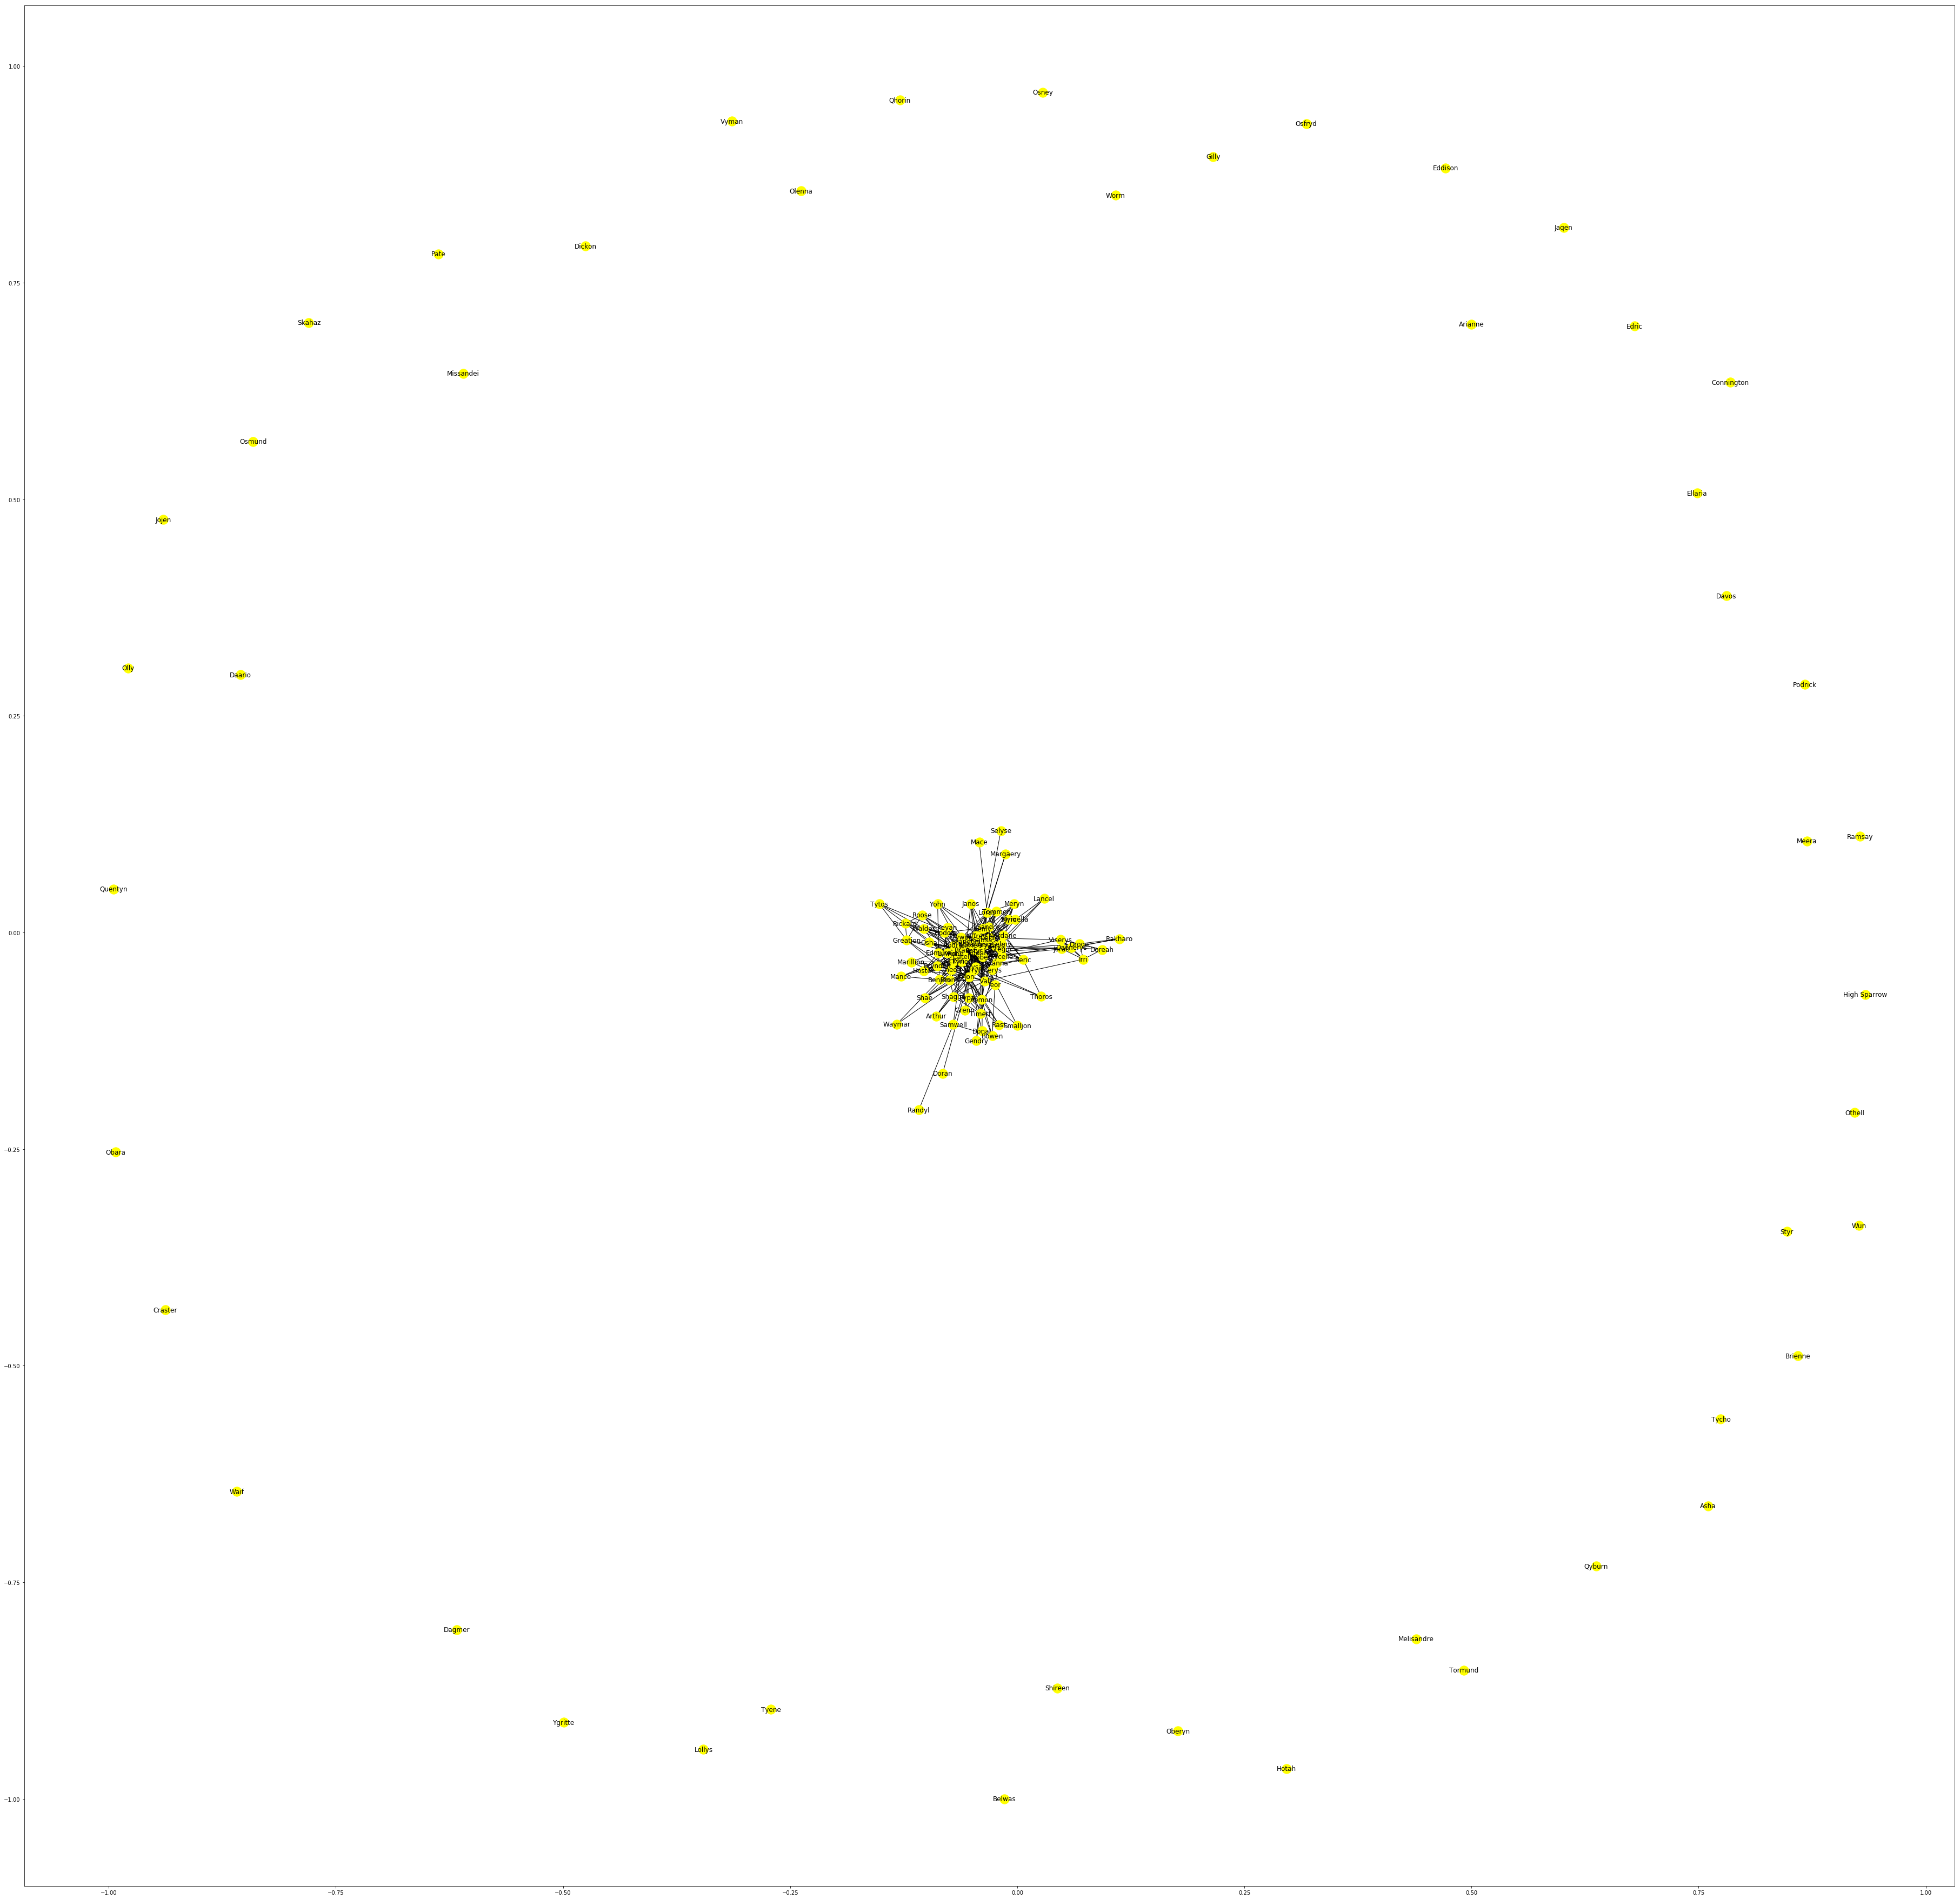

In [9]:
plt.figure(3,figsize=(64,64)) 
nx.draw_networkx(g,node_color='yellow',with_labels=True)
plt.show()

In [10]:
deg = g.degree()
to_keep=[]
for i in deg:
    if(i[1]!=0):
        to_keep.append(i[0])
g1=g.subgraph(to_keep)

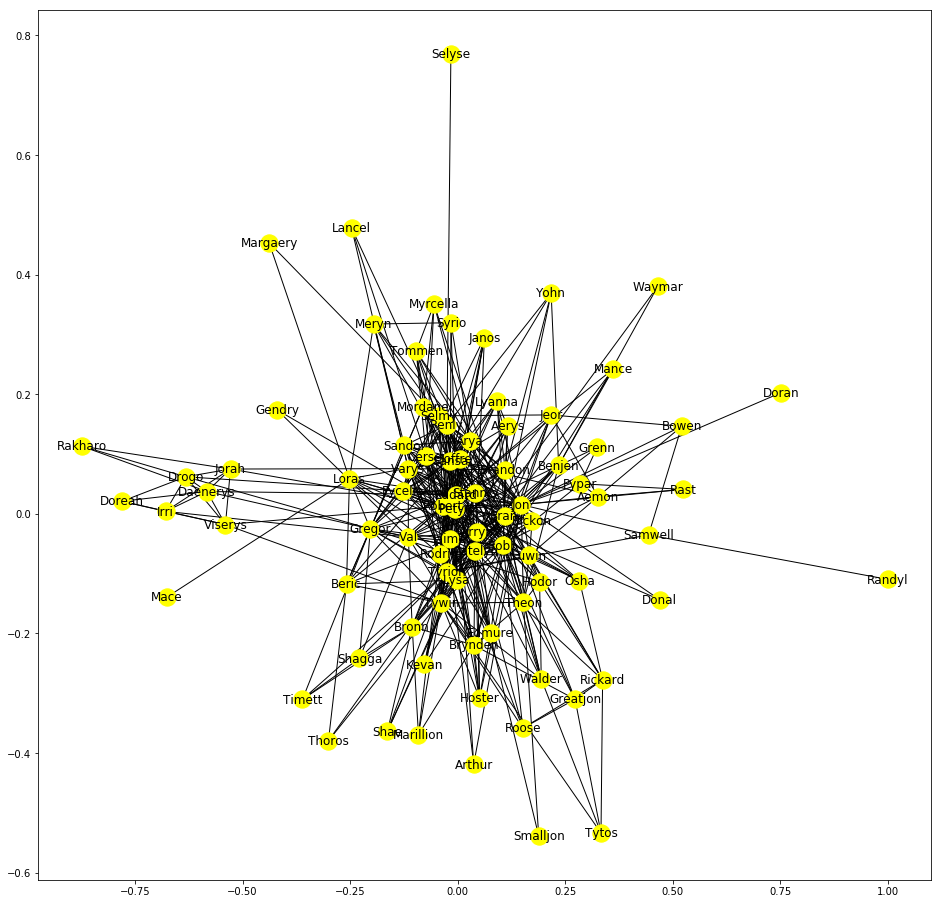

In [11]:
plt.figure(3,figsize=(16,16)) 
nx.draw_networkx(g1,node_color='yellow',with_labels=True)
plt.show()

In [12]:
links1 =[link for link in links if link[2]!=0]
print(links1)

[['Eddard', 'Robert', 61], ['Eddard', 'Jaime', 10], ['Eddard', 'Catelyn', 20], ['Eddard', 'Cersei', 8], ['Eddard', 'Daenerys', 2], ['Eddard', 'Jon', 24], ['Eddard', 'Sansa', 17], ['Eddard', 'Arya', 9], ['Eddard', 'Robb', 6], ['Eddard', 'Bran', 14], ['Eddard', 'Theon', 3], ['Eddard', 'Joffrey', 6], ['Eddard', 'Sandor', 3], ['Eddard', 'Gregor', 5], ['Eddard', 'Tyrion', 6], ['Eddard', 'Petyr', 22], ['Eddard', 'Stannis', 4], ['Eddard', 'Varys', 18], ['Eddard', 'Tywin', 5], ['Eddard', 'Pycelle', 12], ['Eddard', 'Osha', 1], ['Eddard', 'Rickon', 2], ['Eddard', 'Janos', 2], ['Eddard', 'Rodrik', 5], ['Eddard', 'Luwin', 5], ['Eddard', 'Selmy', 12], ['Eddard', 'Loras', 5], ['Eddard', 'Beric', 1], ['Eddard', 'Lysa', 4], ['Eddard', 'Edmure', 2], ['Eddard', 'Renly', 16], ['Eddard', 'Arryn', 12], ['Eddard', 'Mance', 1], ['Eddard', 'Val', 2], ['Eddard', 'Arthur', 1], ['Eddard', 'Brandon', 5], ['Eddard', 'Aerys', 7], ['Eddard', 'Smalljon', 1], ['Eddard', 'Lyanna', 9], ['Eddard', 'Syrio', 3], ['Eddard',

In [13]:
print(len(links1))

498


In [14]:
edge_list=[]
for i in links1:
    ind1=-1
    ind2=-1
    for j in range(len(characters)):
        if i[0] in characters[j]:
            ind1=j
        if i[1] in characters[j]:
            ind2=j
    l1=[ind1,ind2,i[2]]
    edge_list.append(l1)
print(edge_list)

[[0, 1, 61], [0, 2, 10], [0, 3, 20], [0, 4, 8], [0, 5, 2], [0, 8, 24], [0, 9, 17], [0, 10, 9], [0, 11, 6], [0, 12, 14], [0, 13, 3], [0, 14, 6], [0, 15, 3], [0, 16, 5], [0, 17, 6], [0, 19, 22], [0, 22, 4], [0, 26, 18], [0, 29, 5], [0, 43, 12], [0, 47, 1], [0, 49, 2], [0, 50, 2], [0, 53, 5], [0, 54, 5], [0, 58, 12], [0, 64, 5], [0, 65, 1], [0, 87, 4], [0, 88, 2], [0, 91, 16], [0, 92, 12], [0, 97, 1], [0, 100, 2], [0, 102, 1], [0, 103, 5], [0, 104, 7], [0, 112, 1], [0, 113, 9], [0, 124, 3], [0, 128, 5], [1, 2, 4], [1, 3, 4], [1, 4, 10], [1, 6, 1], [1, 7, 1], [1, 8, 8], [1, 9, 5], [1, 11, 1], [1, 12, 3], [1, 13, 1], [1, 14, 4], [1, 17, 4], [1, 19, 4], [1, 22, 5], [1, 24, 1], [1, 26, 6], [1, 29, 4], [1, 31, 1], [1, 43, 7], [1, 47, 1], [1, 58, 5], [1, 64, 1], [1, 87, 4], [1, 88, 1], [1, 89, 1], [1, 90, 1], [1, 91, 12], [1, 92, 13], [1, 98, 1], [1, 100, 2], [1, 102, 1], [1, 103, 1], [1, 104, 4], [1, 113, 2], [2, 3, 3], [2, 4, 5], [2, 8, 1], [2, 9, 1], [2, 10, 1], [2, 11, 4], [2, 12, 1], [2, 1

In [15]:
f=open('edge_list.txt','w')
for i in edge_list:
    str1=str(i[0])
    str1+=" "
    str1+=str(i[1])
    str1+=" "
    str1+=str(i[2])
    str1+="\n"
    f.write(str1)
f.close()

In [16]:
f=open('edge_list_unweighted.txt','w')
for i in edge_list:
    str1=str(i[0])
    str1+=" "
    str1+=str(i[1])
    str1+="\n"
    f.write(str1)
f.close()

# Creating graph for Clash of Kings

In [17]:
file_2 = open("Clash_Of_Kings.txt", "r",encoding="utf8") 

text_2 = file_2.read()
text_2 = text_2.replace('\n',' ')
text_2 = text_2.replace("\'",'')
#text = text.replace("-",' ')
#text = text.lower()
print(text_2[:70])

The comet’s tail spread across the dawn, a red slash that bled above t


In [18]:
words_list_2 = text_2.split(' ')

In [19]:
links_2 = []
window_2 =15
window_parts_2 = []
for k in range(0, len(words_list_2),window_2):
    text_current = words_list_2[k:k+window]
    window_parts_2.append(' '.join(text_current))


for i in range(0,len(characters)):
    for j in range (i+1, len(characters) ):
        count = 0
        for part in window_parts_2:
            for k in characters[i]:
                for l in characters[j]:
                    if (len(re.findall(k,part)) > 0) and (len(re.findall(l,part)) > 0):
                        count += 1
                    
        edge_2 = []
        edge_2.append(characters[i][0])
        edge_2.append(characters[j][0])
        edge_2.append(count)
        links_2.append(edge_2)

In [20]:
char_first=[]
for i in characters:
    char_first.append(i[0])
g_2 = nx.Graph()
g_2.add_nodes_from(char_first)
for i in links_2:
    if (i[2]!= 0):
        g_2.add_edge(i[0],i[1], weight = int(i[2]))
print(nx.info(g_2))

Name: 
Type: Graph
Number of nodes: 131
Number of edges: 498
Average degree:   7.6031


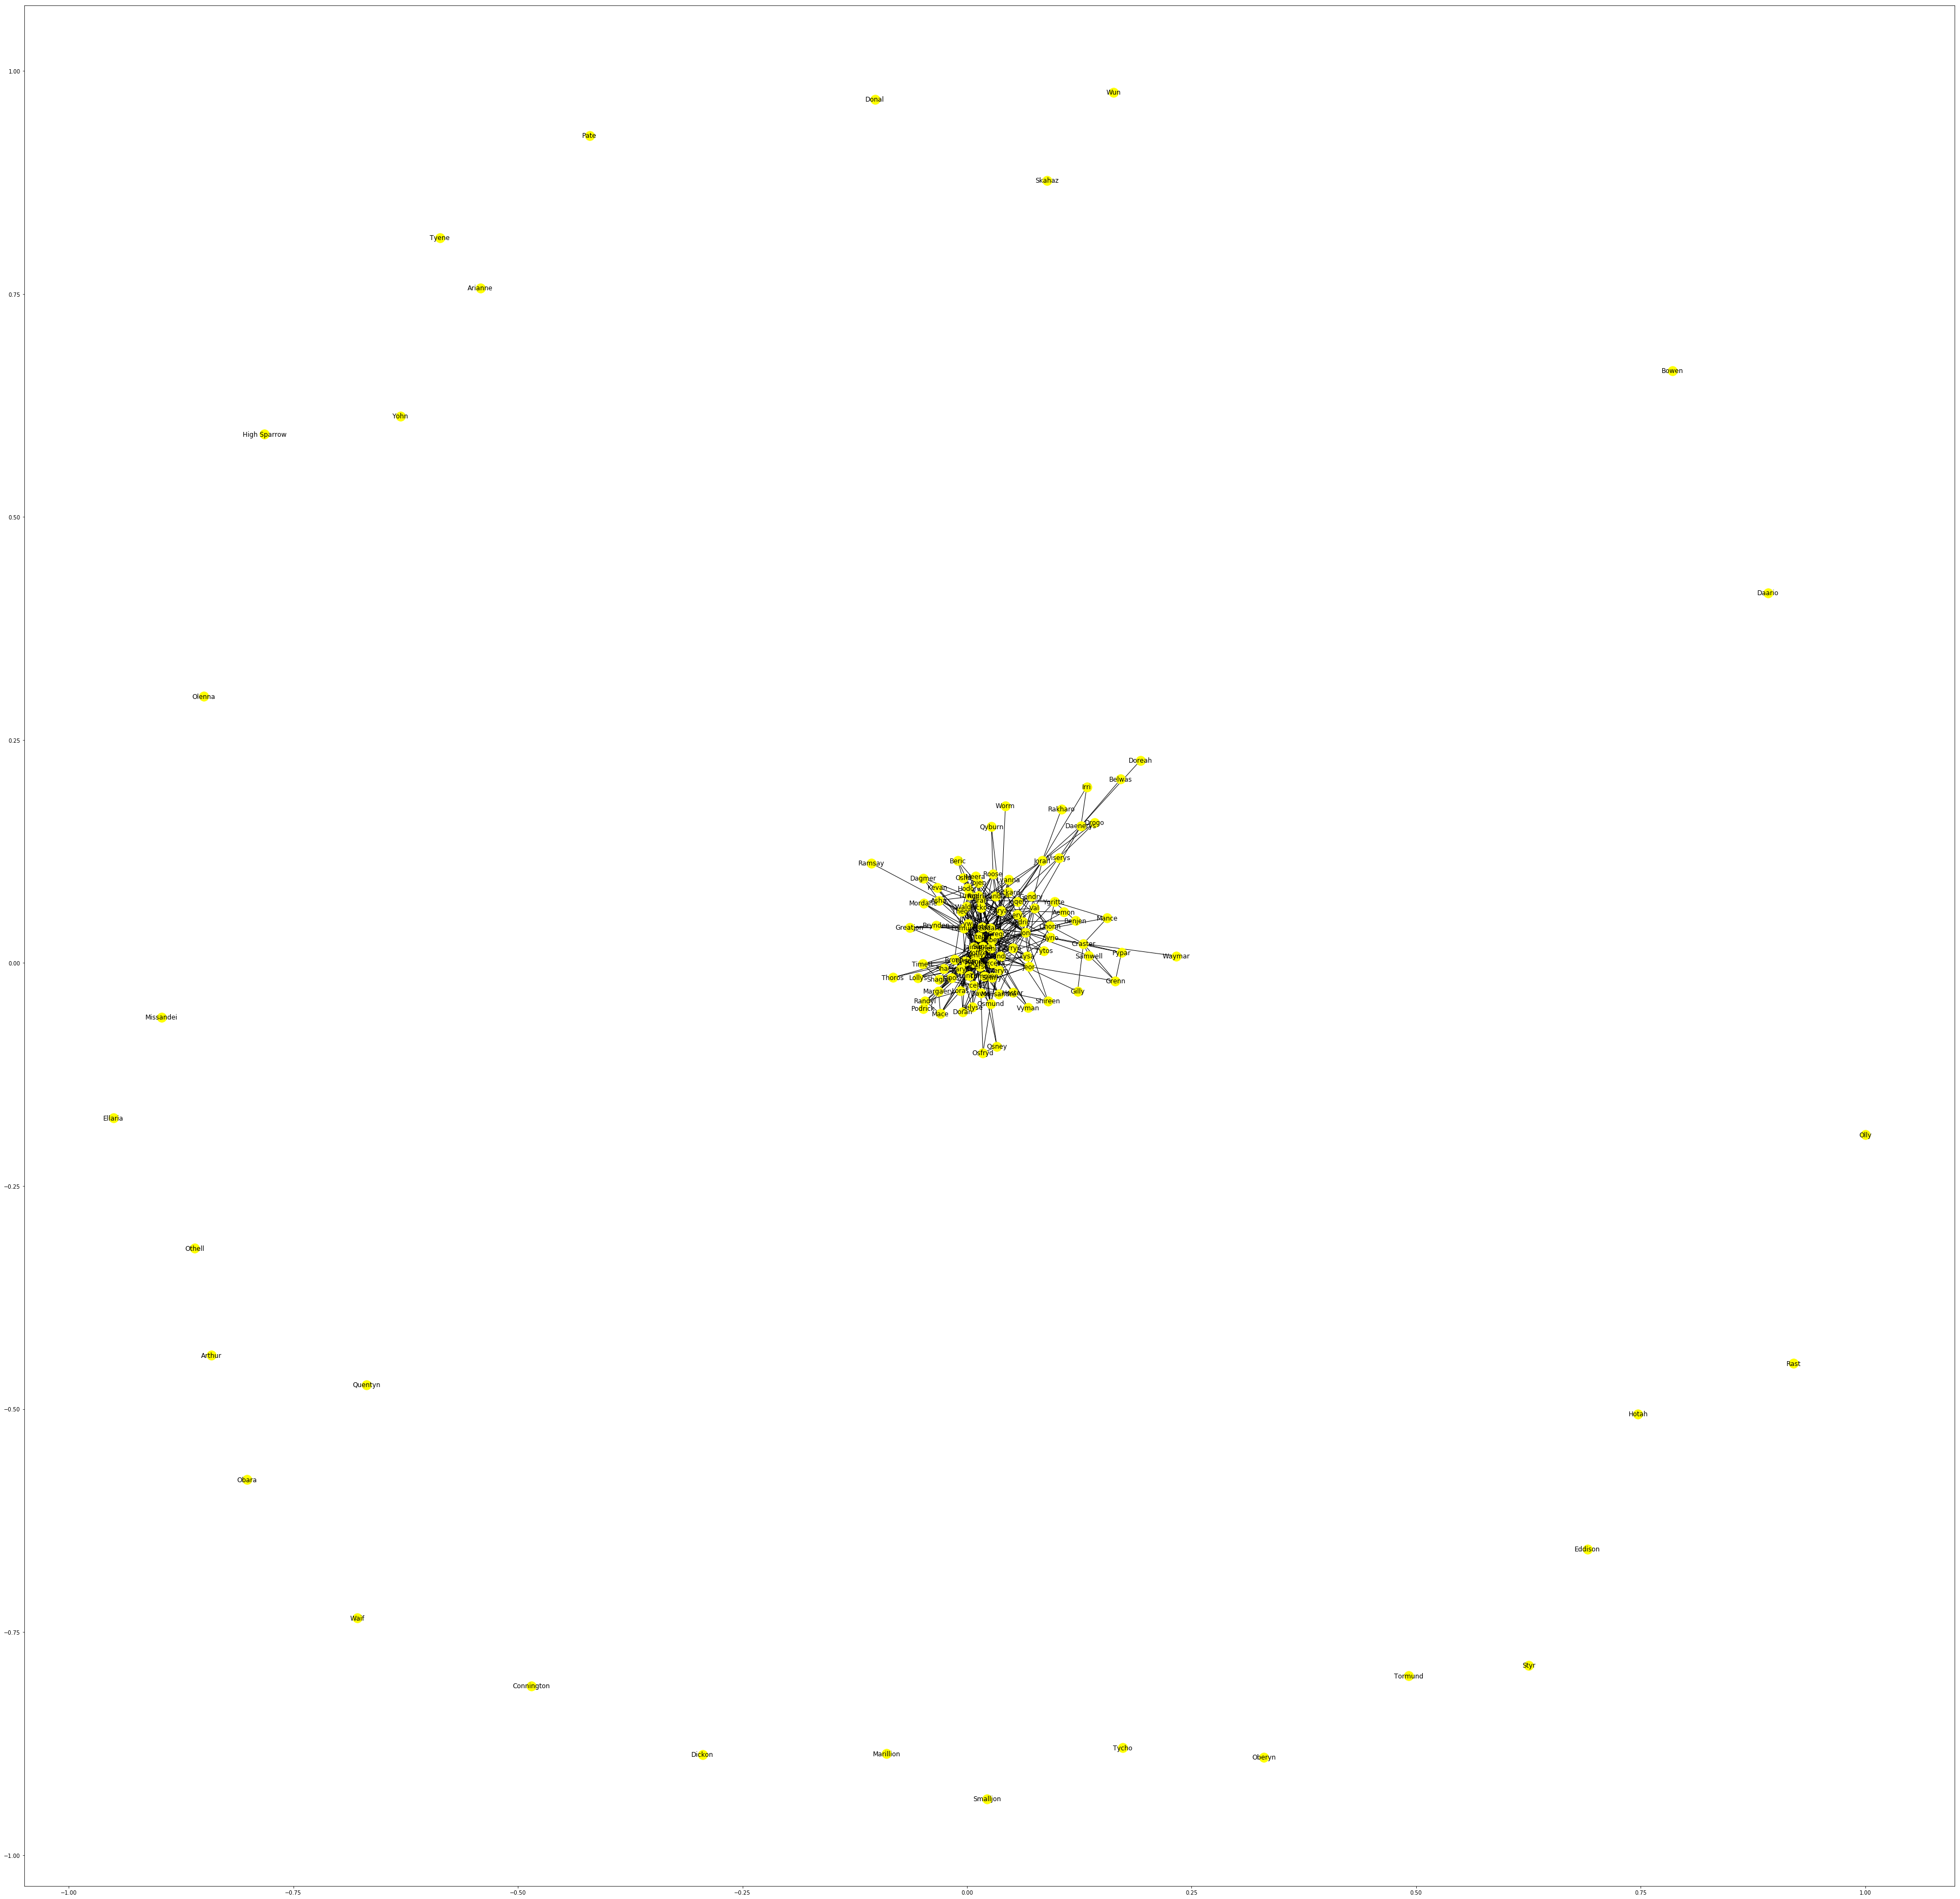

In [21]:
plt.figure(3,figsize=(64,64)) 
nx.draw_networkx(g_2,node_color='yellow',with_labels=True)
plt.show()

In [22]:
deg_2 = g_2.degree()
to_keep_2=[]
for i in deg_2:
    if(i[1]!=0):
        to_keep_2.append(i[0])
g_2_sub=g_2.subgraph(to_keep_2)

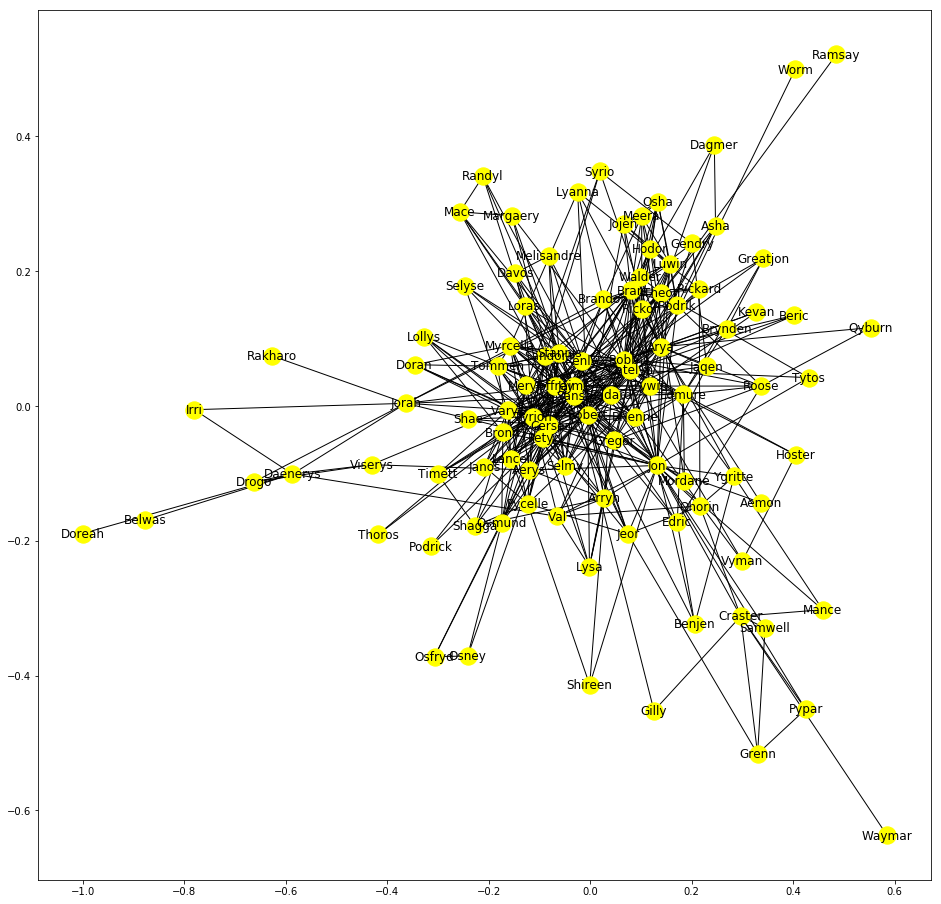

In [23]:
plt.figure(3,figsize=(16,16)) 
nx.draw_networkx(g_2_sub,node_color='yellow',with_labels=True)
plt.show()

# Creating graph for storm of swords

In [24]:
file_3 = open("Storm_Of_Swords.txt", "r",encoding="utf8") 

text_3 = file_3.read()
text_3 = text_3.replace('\n',' ')
text_3 = text_3.replace("\'",'')
#text = text.replace("-",' ')
#text = text.lower()
print(text_3[:70])

The day was grey and bitter cold, and the dogs would not take the scen


In [25]:
words_list_3 = text_3.split(' ')

In [26]:
links_3 = []
window_3 =15
window_parts_3 = []
for k in range(0, len(words_list_3),window_3):
    text_current = words_list_3[k:k+window]
    window_parts_3.append(' '.join(text_current))


for i in range(0,len(characters)):
    for j in range (i+1, len(characters) ):
        count = 0
        for part in window_parts_3:
            for k in characters[i]:
                for l in characters[j]:
                    if (len(re.findall(k,part)) > 0) and (len(re.findall(l,part)) > 0):
                        count += 1
                    
        edge_3 = []
        edge_3.append(characters[i][0])
        edge_3.append(characters[j][0])
        edge_3.append(count)
        links_3.append(edge_3)

In [27]:
char_first=[]
for i in characters:
    char_first.append(i[0])
g_3 = nx.Graph()
g_3.add_nodes_from(char_first)
for i in links_3:
    if (i[2]!= 0):
        g_3.add_edge(i[0],i[1], weight = int(i[2]))
print(nx.info(g_3))

Name: 
Type: Graph
Number of nodes: 131
Number of edges: 622
Average degree:   9.4962


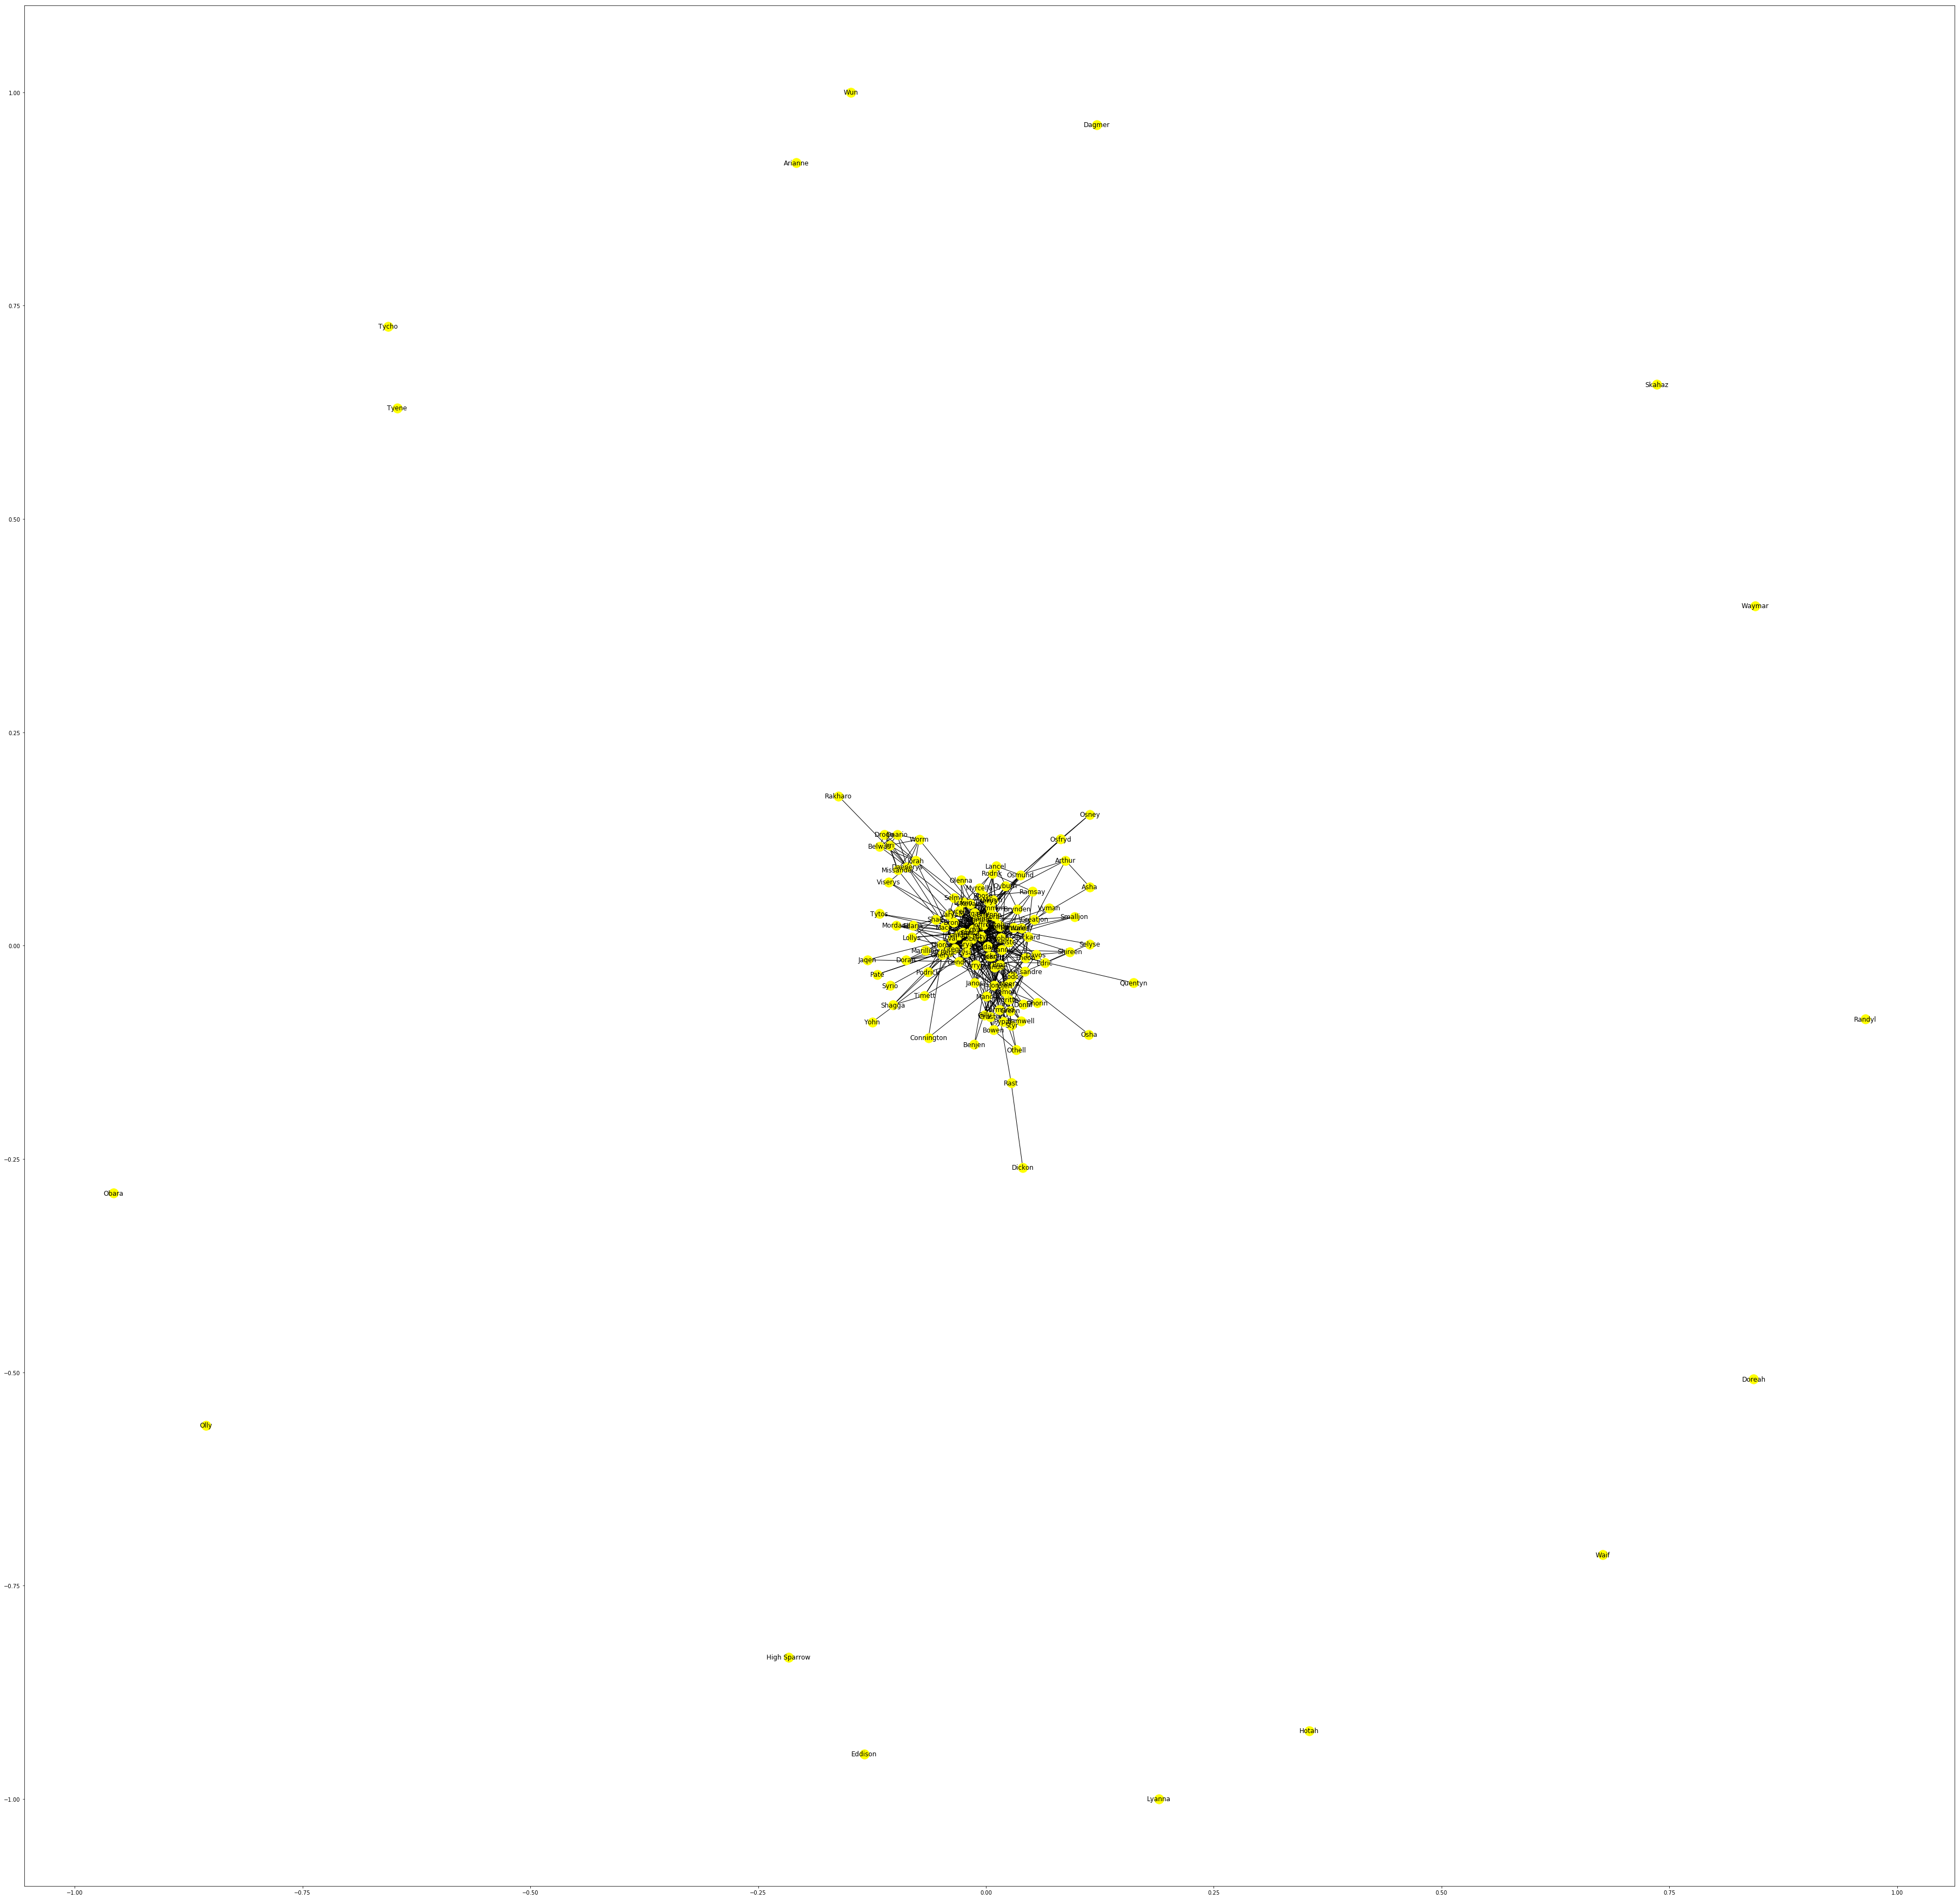

In [28]:
plt.figure(3,figsize=(64,64)) 
nx.draw_networkx(g_3,node_color='yellow',with_labels=True)
plt.show()

In [29]:
deg_3 = g_3.degree()
to_keep_3=[]
for i in deg_3:
    if(i[1]!=0):
        to_keep_3.append(i[0])
g_3_sub=g_3.subgraph(to_keep_3)

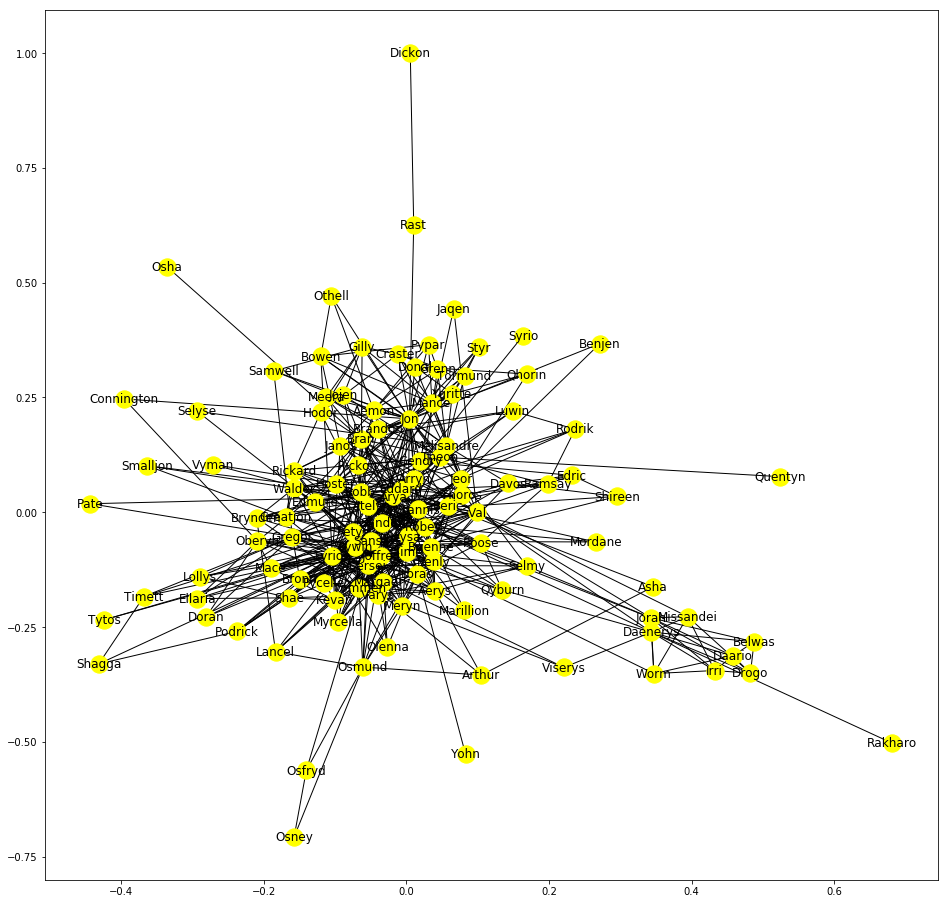

In [30]:
plt.figure(3,figsize=(16,16)) 
nx.draw_networkx(g_3_sub,node_color='yellow',with_labels=True)
plt.show()

# Creating graph for Feast For Crows

In [31]:
file_4 = open("Feast_For_Crows.txt", "r",encoding="utf8") 

text_4 = file_4.read()
text_4 = text_4.replace('\n',' ')
text_4 = text_4.replace("\'",'')
#text = text.replace("-",' ')
#text = text.lower()
print(text_4[:70])

PROLOGUE  Dragons,” said Mollander. He snatched a withered apple off t


In [32]:
words_list_4 = text_4.split(' ')


In [33]:
links_4 = []
window_4 =15
window_parts_4 = []
for k in range(0, len(words_list_4),window_4):
    text_current = words_list_4[k:k+window]
    window_parts_4.append(' '.join(text_current))


for i in range(0,len(characters)):
    for j in range (i+1, len(characters) ):
        count = 0
        for part in window_parts_4:
            for k in characters[i]:
                for l in characters[j]:
                    if (len(re.findall(k,part)) > 0) and (len(re.findall(l,part)) > 0):
                        count += 1
                    
        edge_4 = []
        edge_4.append(characters[i][0])
        edge_4.append(characters[j][0])
        edge_4.append(count)
        links_4.append(edge_4)



In [34]:
char_first=[]
for i in characters:
    char_first.append(i[0])
g_4 = nx.Graph()
g_4.add_nodes_from(char_first)
for i in links_4:
    if (i[2]!= 0):
        g_4.add_edge(i[0],i[1], weight = int(i[2]))
print(nx.info(g_4))

Name: 
Type: Graph
Number of nodes: 131
Number of edges: 352
Average degree:   5.3740


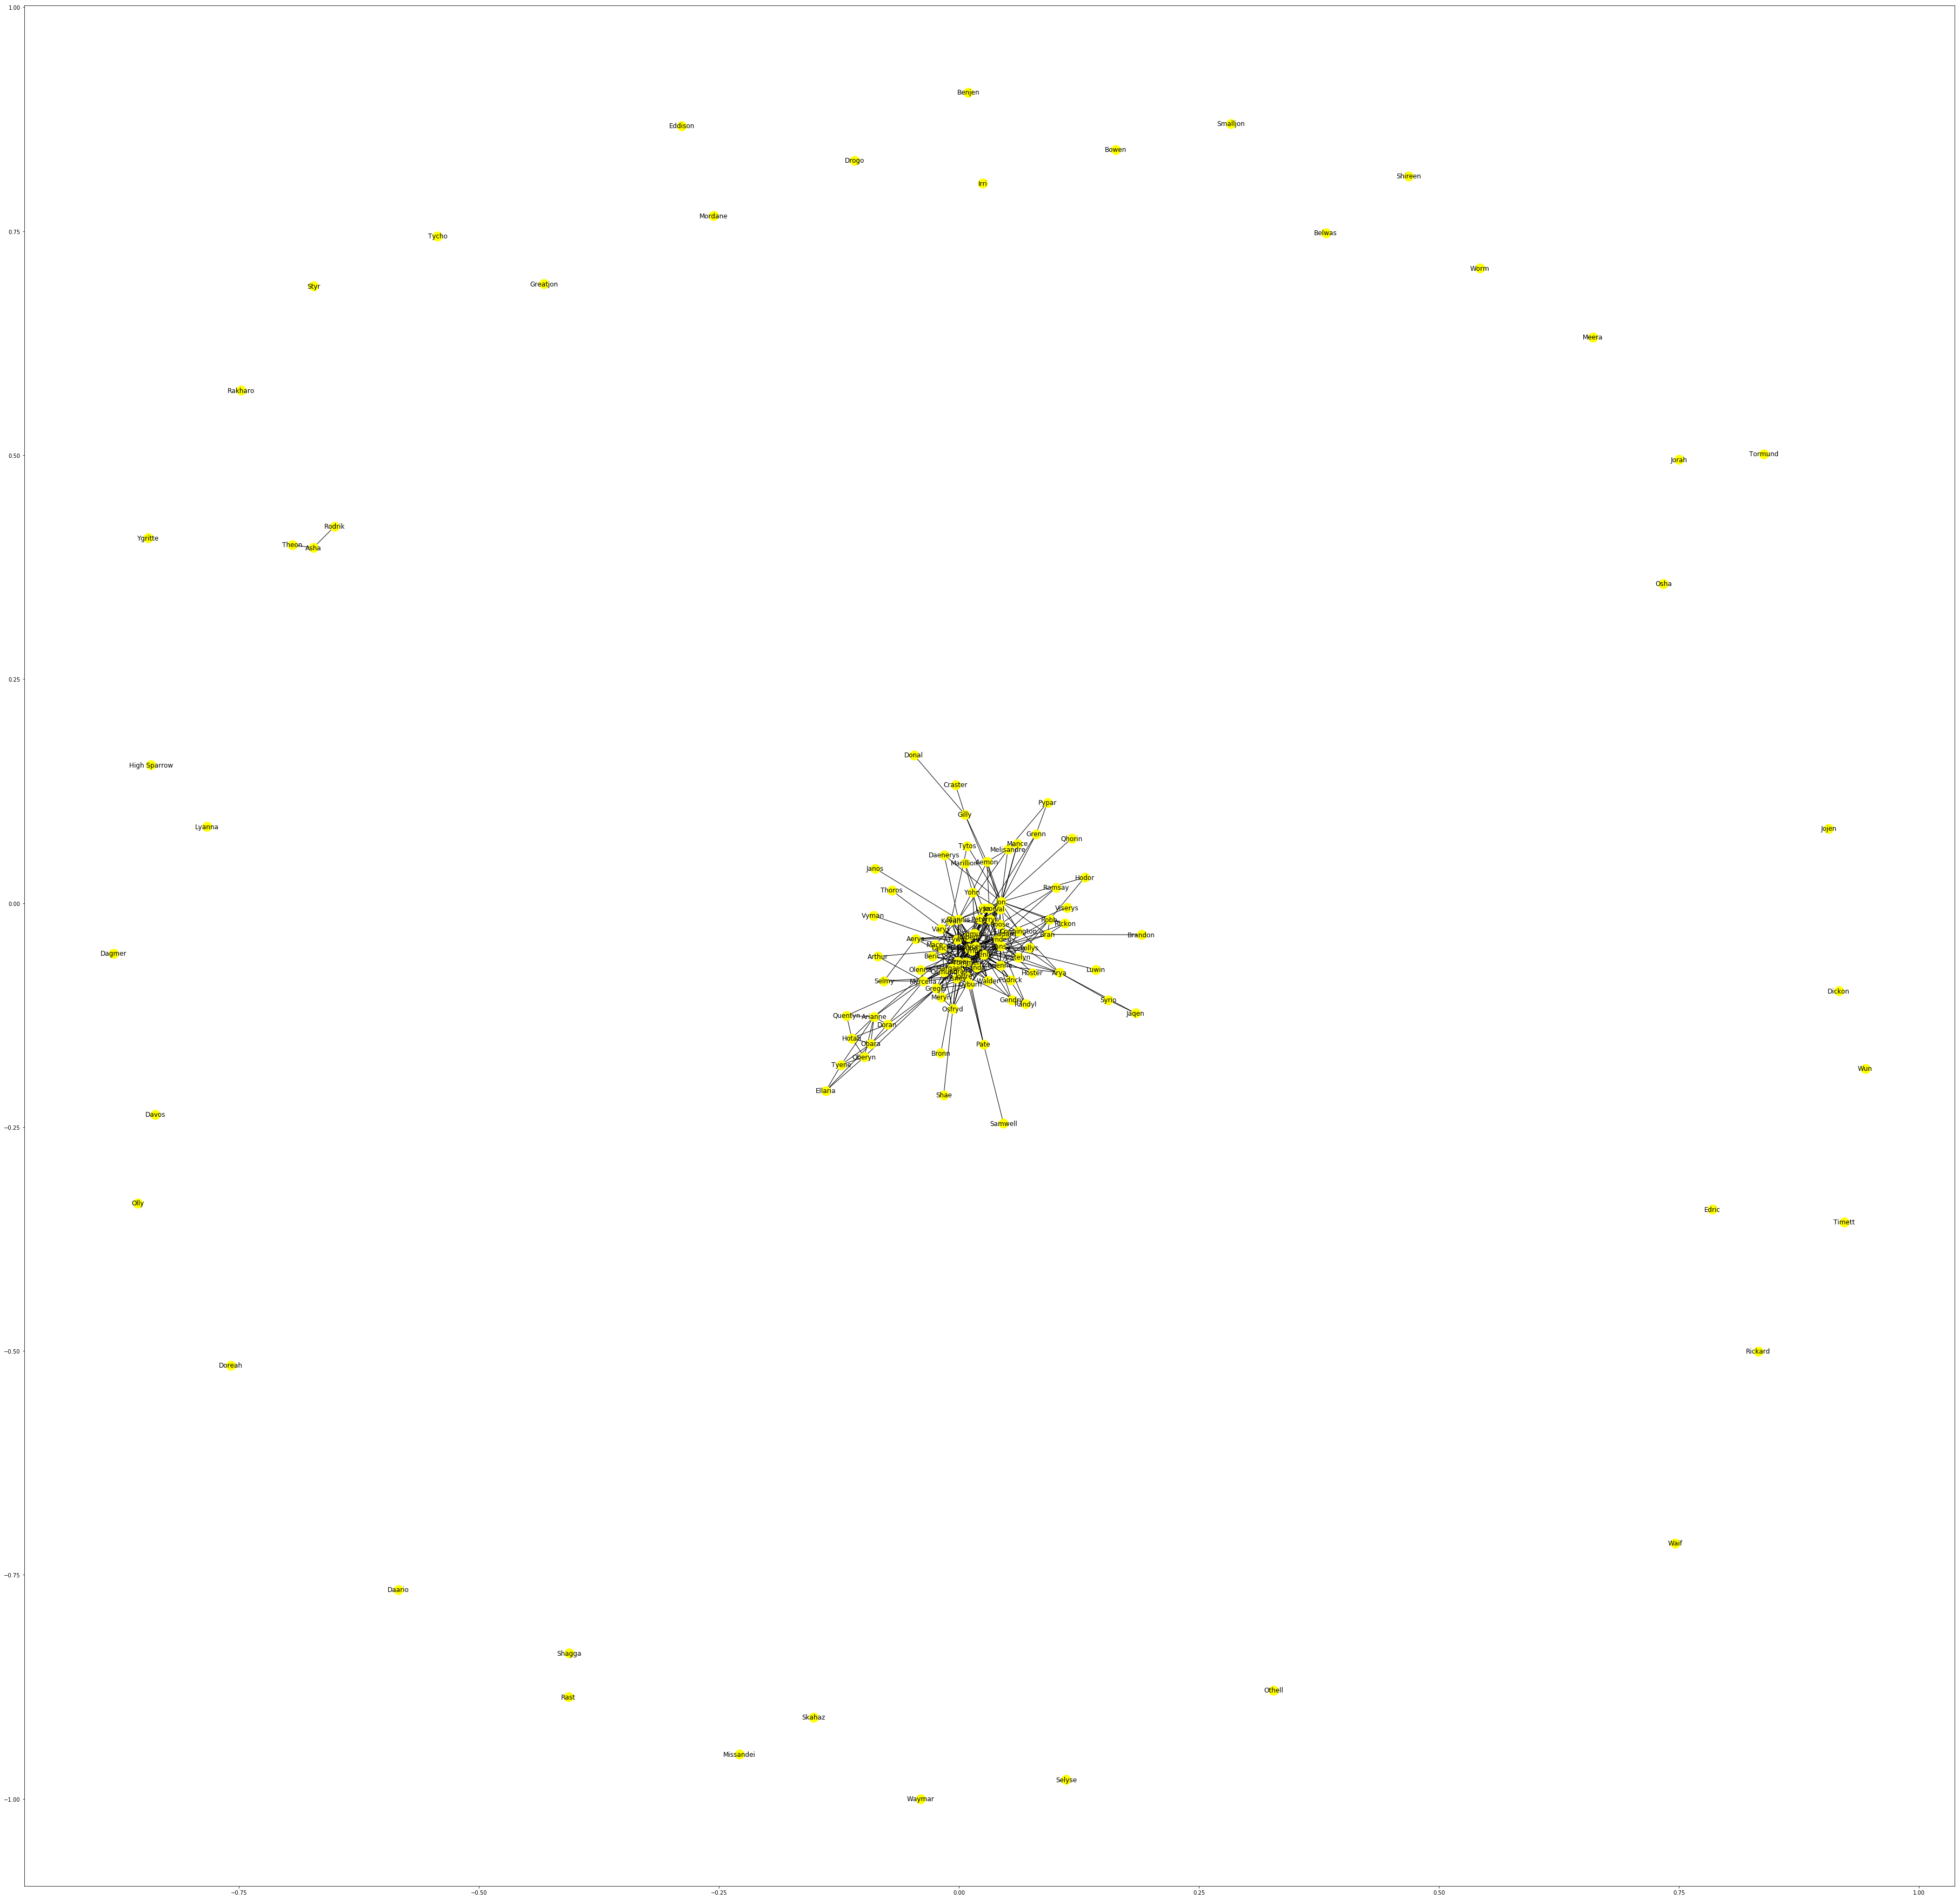

In [35]:
plt.figure(3,figsize=(64,64)) 
nx.draw_networkx(g_4,node_color='yellow',with_labels=True)
plt.show()

In [36]:
deg_4 = g_4.degree()
to_keep_4=[]
for i in deg_4:
    if(i[1]!=0):
        to_keep_4.append(i[0])
g_4_sub=g_4.subgraph(to_keep_4)

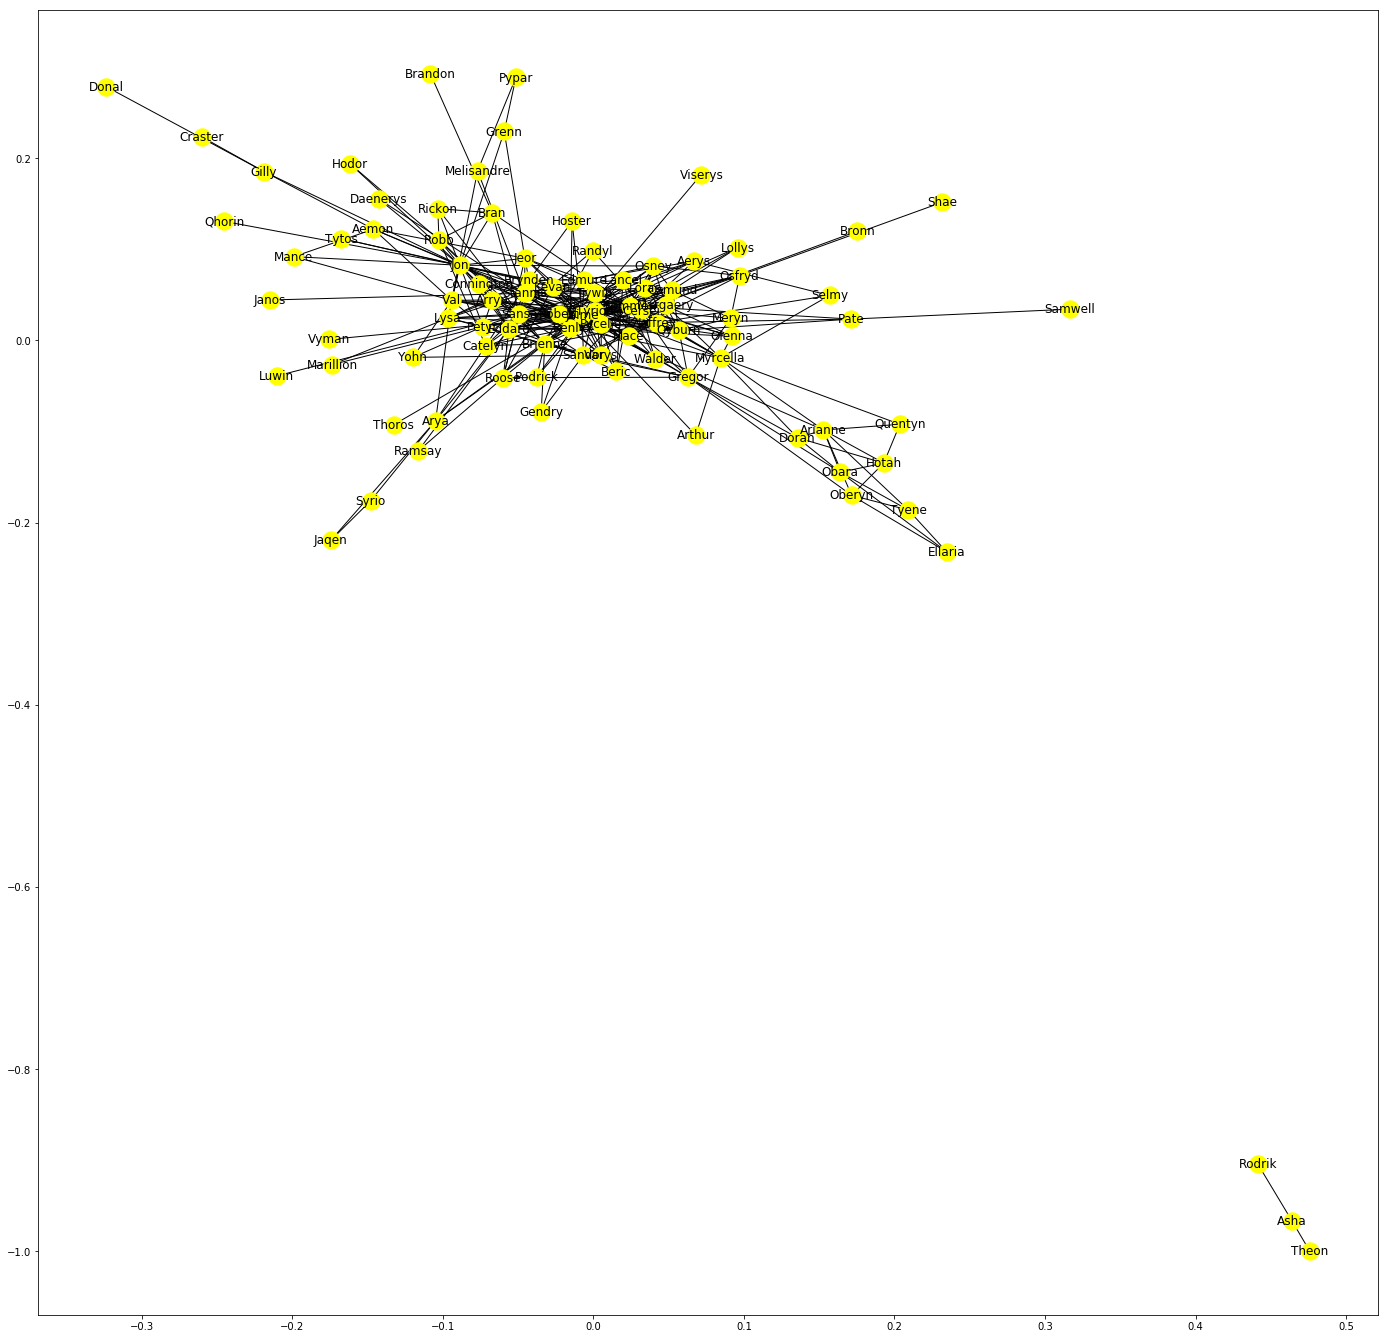

In [37]:
plt.figure(3,figsize=(24,24)) 
nx.draw_networkx(g_4_sub,node_color='yellow',with_labels=True)
plt.show()

# Creating graph for Dance with dragons

In [38]:
file_5 = open("Dance_With_Dragons.txt", "r") 

In [39]:
text_5 = file_5.read()
text_5 = text_5.replace('\n',' ')
text_5 = text_5.replace("\'",'')
#text = text.replace("-",' ')
#text = text.lower()
print(text_5[:70])

PROLOGUE  The night was rank with the smell of man.  The warg stopped 


In [40]:
words_list_5 = text_5.split(' ')

In [41]:
links_5 = []
window_5 =15
window_parts_5 = []
for k in range(0, len(words_list_5),window_5):
    text_current = words_list_5[k:k+window]
    window_parts_5.append(' '.join(text_current))


for i in range(0,len(characters)):
    for j in range (i+1, len(characters) ):
        count = 0
        for part in window_parts_5:
            for k in characters[i]:
                for l in characters[j]:
                    if (len(re.findall(k,part)) > 0) and (len(re.findall(l,part)) > 0):
                        count += 1
                    
        edge_5 = []
        edge_5.append(characters[i][0])
        edge_5.append(characters[j][0])
        edge_5.append(count)
        links_5.append(edge_5)


In [42]:
char_first=[]
for i in characters:
    char_first.append(i[0])
g_5 = nx.Graph()
g_5.add_nodes_from(char_first)
for i in links_5:
    if (i[2]!= 0):
        g_5.add_edge(i[0],i[1], weight = int(i[2]))
print(nx.info(g_5))

Name: 
Type: Graph
Number of nodes: 131
Number of edges: 347
Average degree:   5.2977


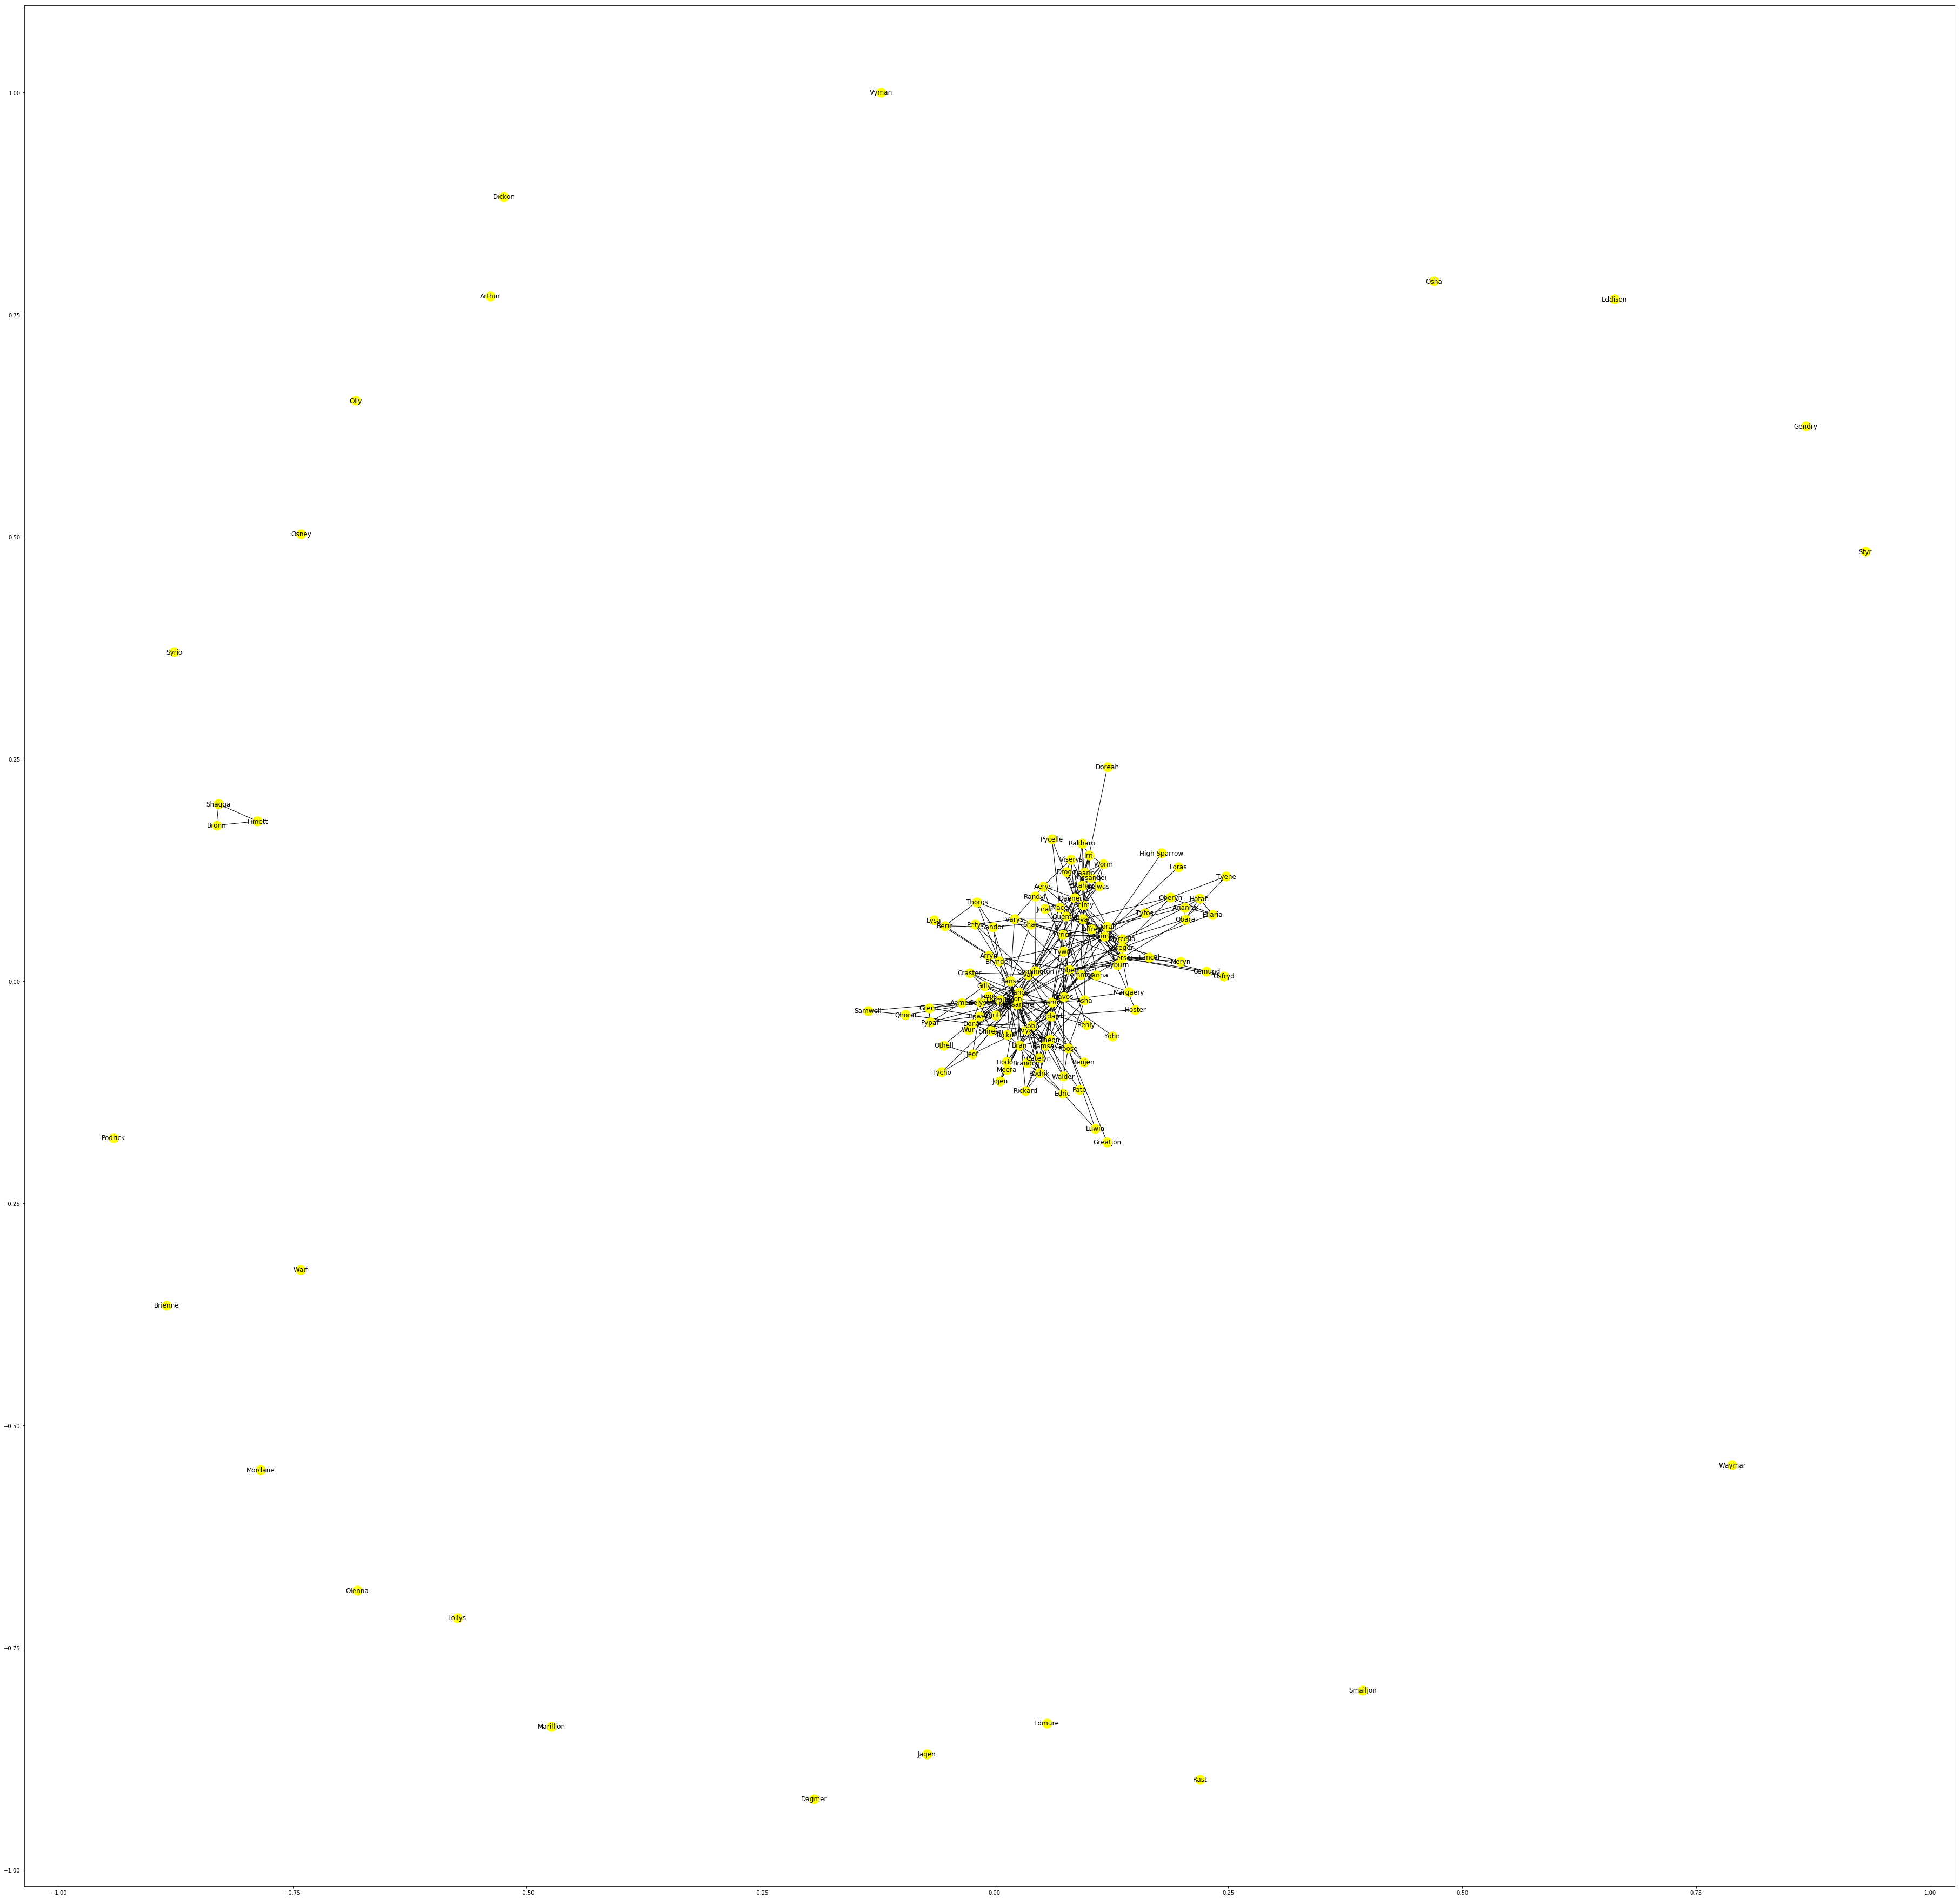

In [43]:
plt.figure(3,figsize=(64,64)) 
nx.draw_networkx(g_5,node_color='yellow',with_labels=True)
plt.show()


In [44]:
deg_5 = g_5.degree()
to_keep_5=[]
for i in deg_5:
    if(i[1]!=0):
        to_keep_5.append(i[0])
g_5_sub=g_5.subgraph(to_keep_5)

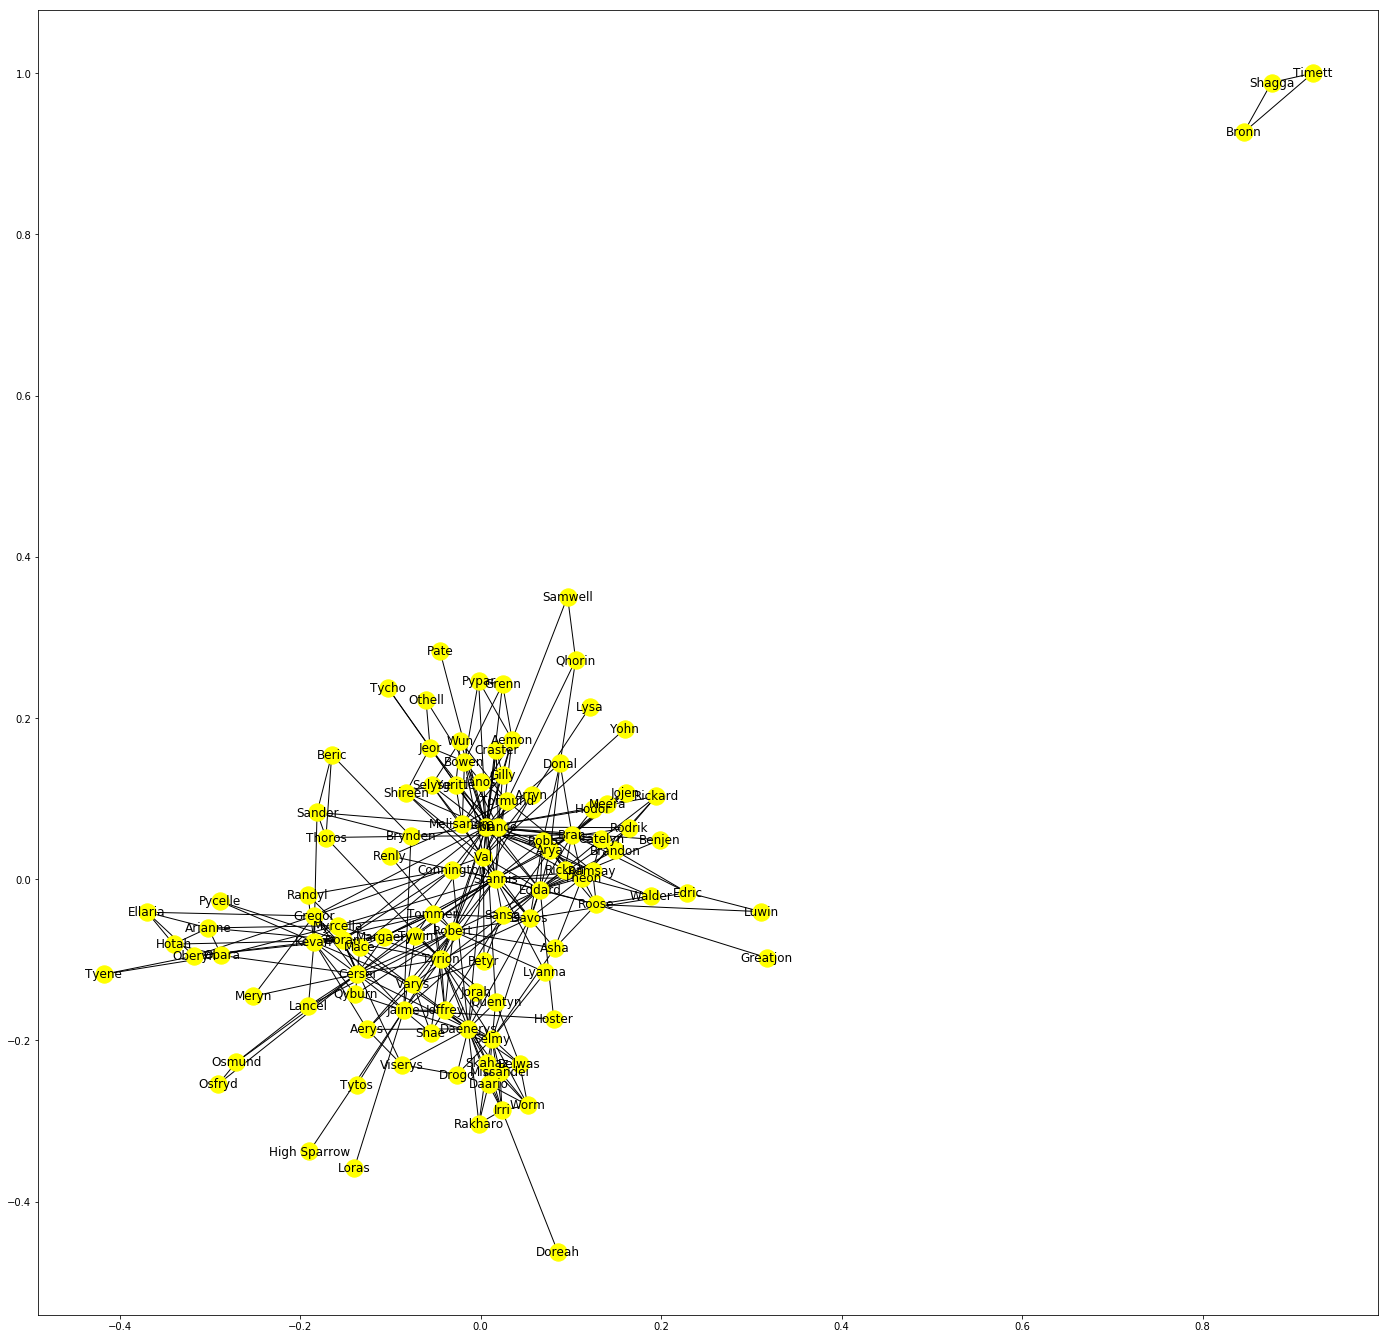

In [45]:
plt.figure(3,figsize=(24,24)) 
nx.draw_networkx(g_5_sub,node_color='yellow',with_labels=True)
plt.show()

# Centrality Measures

## Computing Degree Centrality for all books.

In [46]:
degc = nx.degree_centrality(g1)
degc=sorted(degc.items(), key=itemgetter(1), reverse=True)
degc_2 = nx.degree_centrality(g_2_sub)
degc_2=sorted(degc_2.items(), key=itemgetter(1), reverse=True)
degc_3 = nx.degree_centrality(g_3_sub)
degc_3=sorted(degc_3.items(), key=itemgetter(1), reverse=True)
degc_4 = nx.degree_centrality(g_4_sub)
degc_4=sorted(degc_4.items(), key=itemgetter(1), reverse=True)
degc_5 = nx.degree_centrality(g_5_sub)
degc_5=sorted(degc_5.items(), key=itemgetter(1), reverse=True)

In [47]:
for i in range(10):
    print(degc[i],degc_2[i],degc_3[i],degc_4[i],degc_5[i])
    print("\n\n")

('Eddard', 0.49397590361445787) ('Robb', 0.36) ('Tyrion', 0.40350877192982454) ('Jaime', 0.45555555555555555) ('Jon', 0.38317757009345793)



('Jon', 0.4819277108433735) ('Tyrion', 0.35000000000000003) ('Jaime', 0.3421052631578947) ('Cersei', 0.32222222222222224) ('Stannis', 0.21495327102803738)



('Robert', 0.42168674698795183) ('Joffrey', 0.34) ('Robb', 0.3421052631578947) ('Tyrion', 0.2888888888888889) ('Daenerys', 0.18691588785046728)



('Tyrion', 0.39759036144578314) ('Cersei', 0.33) ('Jon', 0.3421052631578947) ('Jon', 0.2777777777777778) ('Eddard', 0.18691588785046728)



('Bran', 0.39759036144578314) ('Jon', 0.32) ('Joffrey', 0.32456140350877194) ('Tommen', 0.26666666666666666) ('Cersei', 0.16822429906542055)



('Catelyn', 0.39759036144578314) ('Robert', 0.3) ('Sansa', 0.32456140350877194) ('Sansa', 0.2555555555555556) ('Tyrion', 0.1588785046728972)



('Sansa', 0.39759036144578314) ('Catelyn', 0.28) ('Tywin', 0.3070175438596491) ('Robert', 0.22222222222222224) ('Robert', 0.1

## Computing Betweenness Centrality for all books.

In [48]:
betc = nx.betweenness_centrality(g1)
betc=sorted(betc.items(), key=itemgetter(1), reverse=True)
betc_2 = nx.betweenness_centrality(g_2_sub)
betc_2=sorted(betc_2.items(), key=itemgetter(1), reverse=True)
betc_3 = nx.betweenness_centrality(g_3_sub)
betc_3=sorted(betc_3.items(), key=itemgetter(1), reverse=True)
betc_4 = nx.betweenness_centrality(g_4_sub)
betc_4=sorted(betc_4.items(), key=itemgetter(1), reverse=True)
betc_5 = nx.betweenness_centrality(g_5_sub)
betc_5=sorted(betc_5.items(), key=itemgetter(1), reverse=True)

In [49]:
for i in range(10):
    print(betc[i],betc_2[i],betc_3[i],betc_4[i],betc_5[i])
    print("\n\n")

('Jon', 0.1558303403689177) ('Jon', 0.17710341178232736) ('Jon', 0.17244624149630655) ('Jaime', 0.2147079744729569) ('Jon', 0.32215927747189677)



('Eddard', 0.10930514044234378) ('Robb', 0.11018248752156) ('Tyrion', 0.10732866775918805) ('Jon', 0.17196695813202342) ('Daenerys', 0.09937883385355666)



('Robert', 0.0934138411532253) ('Arya', 0.09010691125892362) ('Joffrey', 0.08215037099601981) ('Cersei', 0.08586619413998126) ('Stannis', 0.09844928872302053)



('Tyrion', 0.08636167118035361) ('Joffrey', 0.08370848224684262) ('Robb', 0.08086949102614663) ('Gregor', 0.07590203122383178) ('Eddard', 0.08939503083007126)



('Robb', 0.05549714373796256) ('Tyrion', 0.08265917147281515) ('Jaime', 0.07166229194132333) ('Sansa', 0.06853630523879689) ('Cersei', 0.08648383281954494)



('Bran', 0.05375818687575417) ('Cersei', 0.08222215933687348) ('Robert', 0.06128664785333333) ('Stannis', 0.06521884282105413) ('Jaime', 0.07827443730539367)



('Sansa', 0.04819860563401439) ('Jorah', 0.07594197

## Computing Eigen Vector Centrality for all books.

In [50]:
eigc = nx.eigenvector_centrality(g1)
eigc=sorted(eigc.items(), key=itemgetter(1), reverse=True)
eigc_2 = nx.eigenvector_centrality(g_2_sub)
eigc_2=sorted(eigc_2.items(), key=itemgetter(1), reverse=True)
eigc_3 = nx.eigenvector_centrality(g_3_sub)
eigc_3=sorted(eigc_3.items(), key=itemgetter(1), reverse=True)
eigc_4 = nx.eigenvector_centrality(g_4_sub)
eigc_4=sorted(eigc_4.items(), key=itemgetter(1), reverse=True)
eigc_5 = nx.eigenvector_centrality(g_5_sub)
eigc_5=sorted(eigc_5.items(), key=itemgetter(1), reverse=True)

In [51]:
for i in range(10):
    print(eigc[i],eigc_2[i],eigc_3[i],eigc_4[i],eigc_5[i])
    print("\n\n")

('Eddard', 0.2617999375761367) ('Joffrey', 0.2571967514606583) ('Tyrion', 0.26044936668536534) ('Jaime', 0.34160638389296366) ('Jon', 0.39004529090296974)



('Jon', 0.2343643925499067) ('Tyrion', 0.2523571744978682) ('Jaime', 0.24523411566388434) ('Cersei', 0.26528897437119403) ('Stannis', 0.298178085422709)



('Catelyn', 0.23328017797228817) ('Robb', 0.2481404855212285) ('Sansa', 0.23784318732045723) ('Tyrion', 0.26310823276254464) ('Eddard', 0.260908706919393)



('Robert', 0.22919249209367903) ('Cersei', 0.23427441350941647) ('Robb', 0.2330258583233326) ('Tommen', 0.22792211783329175) ('Arya', 0.20965112884193385)



('Jaime', 0.2281996824425589) ('Robert', 0.22632161603836742) ('Joffrey', 0.2241598121653743) ('Robert', 0.2274128999363498) ('Val', 0.19615979428842464)



('Sansa', 0.22070133731581798) ('Jaime', 0.20813803418049778) ('Tywin', 0.22036335832742596) ('Sansa', 0.2160658425775452) ('Tyrion', 0.19532254023735698)



('Bran', 0.21909798728385194) ('Eddard', 0.207591773368

## Computing Closeness Centrality for all books.

In [88]:
cloc = nx.closeness_centrality(g1)
cloc=sorted(cloc.items(), key=itemgetter(1), reverse=True)
cloc_2 = nx.closeness_centrality(g_2_sub)
cloc_2=sorted(cloc_2.items(), key=itemgetter(1), reverse=True)
cloc_3 = nx.closeness_centrality(g_3_sub)
cloc_3=sorted(cloc_3.items(), key=itemgetter(1), reverse=True)
cloc_4 = nx.closeness_centrality(g_4_sub)
cloc_4=sorted(cloc_4.items(), key=itemgetter(1), reverse=True)
cloc_5 = nx.closeness_centrality(g_5_sub)
cloc_5=sorted(cloc_5.items(), key=itemgetter(1), reverse=True)

In [89]:
for i in range(10):
    print(cloc[i],cloc_2[i],cloc_3[i],cloc_4[i],cloc_5[i])
    print("\n\n")

('Eddard', 0.6587301587301587) ('Joffrey', 0.5882352941176471) ('Tyrion', 0.5786802030456852) ('Jaime', 0.5881118881118882) ('Jon', 0.5464006062136904)



('Jon', 0.6335877862595419) ('Robb', 0.5882352941176471) ('Robb', 0.5786802030456852) ('Cersei', 0.5159509202453988) ('Tyrion', 0.4906995735414209)



('Robert', 0.6287878787878788) ('Jon', 0.5813953488372093) ('Sansa', 0.5728643216080402) ('Robert', 0.5159509202453988) ('Stannis', 0.48598130841121495)



('Tyrion', 0.6102941176470589) ('Robert', 0.5747126436781609) ('Jaime', 0.57) ('Tyrion', 0.5128048780487805) ('Eddard', 0.4745732964766794)



('Jaime', 0.5971223021582733) ('Tyrion', 0.5586592178770949) ('Jon', 0.57) ('Jon', 0.4976331360946745) ('Val', 0.4701586611606173)



('Bran', 0.5971223021582733) ('Eddard', 0.5586592178770949) ('Robert', 0.5671641791044776) ('Tommen', 0.49470588235294116) ('Robert', 0.45739417262231996)



('Catelyn', 0.5971223021582733) ('Cersei', 0.5555555555555556) ('Joffrey', 0.5507246376811594) ('Renly'

## Displaying the character with the highest centrality score for each centrality measure for all books

In [128]:
print("Book 1")
print("Degree",degc[0],"\nBetweenness",betc[0],"\nEigen Vector",eigc[0],"\nCloseness",cloc[0])
print("\nBook 2")
print("Degree",degc_2[0],"\nBetweenness",betc_2[0],"\nEigen Vector",eigc_2[0],"\nCloseness",cloc_2[0])
print("\nBook 3")
print("Degree",degc_3[0],"\nBetweenness",betc_3[0],"\nEigen Vector",eigc_3[0],"\nCloseness",cloc_3[0])
print("\nBook 4")
print("Degree",degc_4[0],"\nBetweenness",betc_4[0],"\nEigen Vector",eigc_4[0],"\nCloseness",cloc_4[0])
print("\nBook 5")
print("Degree",degc_5[0],"\nBetweenness",betc_5[0],"\nEigen Vector",eigc_5[0],"\nCloseness",cloc_5[0])

Book 1
Degree ('Eddard', 0.49397590361445787) 
Betweenness ('Jon', 0.1558303403689177) 
Eigen Vector ('Eddard', 0.2617999375761367) 
Closeness ('Eddard', 0.6587301587301587)

Book 2
Degree ('Robb', 0.36) 
Betweenness ('Jon', 0.17710341178232736) 
Eigen Vector ('Joffrey', 0.2571967514606583) 
Closeness ('Joffrey', 0.5882352941176471)

Book 3
Degree ('Tyrion', 0.40350877192982454) 
Betweenness ('Jon', 0.17244624149630655) 
Eigen Vector ('Tyrion', 0.26044936668536534) 
Closeness ('Tyrion', 0.5786802030456852)

Book 4
Degree ('Jaime', 0.45555555555555555) 
Betweenness ('Jaime', 0.2147079744729569) 
Eigen Vector ('Jaime', 0.34160638389296366) 
Closeness ('Jaime', 0.5881118881118882)

Book 5
Degree ('Jon', 0.38317757009345793) 
Betweenness ('Jon', 0.32215927747189677) 
Eigen Vector ('Jon', 0.39004529090296974) 
Closeness ('Jon', 0.5464006062136904)


## Displaying the top 10 characters based on summed degree centrality for all 5 books.

In [112]:
chars_deg=[]
for i in range(len(characters)):
    character_scores=[]
    for j in range(len(degc)):
        if(degc[j][0]==characters[i][0]):
            character_scores.append(degc[j][1])
    for j in range(len(degc_2)):
        if(degc_2[j][0]==characters[i][0]):
            character_scores.append(degc_2[j][1])
    for j in range(len(degc_3)):
        if(degc_3[j][0]==characters[i][0]):
            character_scores.append(degc_3[j][1])
    for j in range(len(degc_4)):
        if(degc_4[j][0]==characters[i][0]):
            character_scores.append(degc_4[j][1])
    for j in range(len(degc_5)):
        if(degc_5[j][0]==characters[i][0]):
            character_scores.append(degc_5[j][1])
    
    samp=(characters[i][0],character_scores)
    chars_deg.append(samp)
chars_summed_deg=[]
for i in chars_deg:
    sum_val=sum(i[1])
    chars_2=(i[0],sum_val)
    chars_summed_deg.append(chars_2)
    
chars_summed_deg=sorted(chars_summed_deg, key=lambda x: x[1],reverse=True)
for i in range(10):
    print(chars_summed_deg[i])

('Jon', 1.8049883218725038)
('Tyrion', 1.5988665269373938)
('Jaime', 1.5533899032759995)
('Eddard', 1.3865058265526444)
('Robert', 1.3747172984444747)
('Cersei', 1.369484779583986)
('Sansa', 1.3031278812577742)
('Robb', 1.2561807551570439)
('Joffrey', 1.1533001591544074)
('Stannis', 1.1197739572818244)


## Displaying the top 10 characters based on summed betweenness centrality for all 5 books.

In [113]:
chars_bet=[]
for i in range(len(characters)):
    character_scores=[]
    for j in range(len(betc)):
        if(betc[j][0]==characters[i][0]):
            character_scores.append(betc[j][1])
    for j in range(len(betc_2)):
        if(betc_2[j][0]==characters[i][0]):
            character_scores.append(betc_2[j][1])
    for j in range(len(betc_3)):
        if(betc_3[j][0]==characters[i][0]):
            character_scores.append(betc_3[j][1])
    for j in range(len(betc_4)):
        if(betc_4[j][0]==characters[i][0]):
            character_scores.append(betc_4[j][1])
    for j in range(len(betc_5)):
        if(betc_5[j][0]==characters[i][0]):
            character_scores.append(betc_5[j][1])
    
    samp=(characters[i][0],character_scores)
    chars_bet.append(samp)
chars_summed_bet=[]
for i in chars_bet:
    sum_val=sum(i[1])
    chars_2=(i[0],sum_val)
    chars_summed_bet.append(chars_2)
    
chars_summed_bet=sorted(chars_summed_bet, key=lambda x: x[1],reverse=True)
for i in range(10):
    print(chars_summed_bet[i])

('Jon', 0.9995062292514718)
('Jaime', 0.41862343794881307)
('Tyrion', 0.40177268672930116)
('Robert', 0.35758617414492166)
('Cersei', 0.3174916589879967)
('Eddard', 0.31738743281731213)
('Robb', 0.256750325442104)
('Stannis', 0.24573221157324374)
('Sansa', 0.23818926505524063)
('Arya', 0.234610861655327)


## Displaying the top 10 characters based on closeness degree centrality for all 5 books.

In [114]:
chars_clo=[]
for i in range(len(characters)):
    character_scores=[]
    for j in range(len(cloc)):
        if(cloc[j][0]==characters[i][0]):
            character_scores.append(cloc[j][1])
    for j in range(len(cloc_2)):
        if(cloc_2[j][0]==characters[i][0]):
            character_scores.append(cloc_2[j][1])
    for j in range(len(cloc_3)):
        if(cloc_3[j][0]==characters[i][0]):
            character_scores.append(cloc_3[j][1])
    for j in range(len(cloc_4)):
        if(cloc_4[j][0]==characters[i][0]):
            character_scores.append(cloc_4[j][1])
    for j in range(len(cloc_5)):
        if(cloc_5[j][0]==characters[i][0]):
            character_scores.append(cloc_5[j][1])
    
    samp=(characters[i][0],character_scores)
    chars_clo.append(samp)
chars_summed_clo=[]
for i in chars_clo:
    sum_val=sum(i[1])
    chars_2=(i[0],sum_val)
    chars_summed_clo.append(chars_2)
    
chars_summed_clo=sorted(chars_summed_clo, key=lambda x: x[1],reverse=True)
for i in range(10):
    print(chars_summed_clo[i])

('Jon', 2.829016877405116)
('Tyrion', 2.7511379901600406)
('Robert', 2.744009794438236)
('Eddard', 2.717988647109907)
('Jaime', 2.6963772121988634)
('Cersei', 2.6091122888889533)
('Sansa', 2.582939128472529)
('Robb', 2.5555702448883792)
('Stannis', 2.5216820854417965)
('Joffrey', 2.510329557674243)


## Displaying the top 10 characters based on summed eigen vector centrality for all 5 books.

In [115]:
chars_eig=[]
for i in range(len(characters)):
    character_scores=[]
    for j in range(len(eigc)):
        if(eigc[j][0]==characters[i][0]):
            character_scores.append(eigc[j][1])
    for j in range(len(eigc_2)):
        if(eigc_2[j][0]==characters[i][0]):
            character_scores.append(eigc_2[j][1])
    for j in range(len(eigc_3)):
        if(eigc_3[j][0]==characters[i][0]):
            character_scores.append(eigc_3[j][1])
    for j in range(len(eigc_4)):
        if(eigc_4[j][0]==characters[i][0]):
            character_scores.append(eigc_4[j][1])
    for j in range(len(eigc_5)):
        if(eigc_5[j][0]==characters[i][0]):
            character_scores.append(eigc_5[j][1])
    
    samp=(characters[i][0],character_scores)
    chars_eig.append(samp)
chars_summed_eig=[]
for i in chars_eig:
    sum_val=sum(i[1])
    chars_2=(i[0],sum_val)
    chars_summed_eig.append(chars_2)
    
chars_summed_eig=sorted(chars_summed_eig, key=lambda x: x[1],reverse=True)
for i in range(10):
    print(chars_summed_eig[i])

('Tyrion', 1.1899050093309622)
('Jaime', 1.147243739884615)
('Jon', 1.138986850234493)
('Eddard', 1.1124882683364279)
('Robert', 1.0793132415476574)
('Cersei', 1.037821167772218)
('Stannis', 0.9778877020047907)
('Sansa', 0.9754264363518901)
('Robb', 0.9038966840890124)
('Joffrey', 0.8948653534419087)


## Displaying the top 10 characters based on sum of all centrality measures for all 5 books.

('Jon', 6.772498278763584)
('Tyrion', 5.941682213157698)
('Jaime', 5.81563429330829)
('Robert', 5.55562650857529)
('Eddard', 5.53437017481629)
('Cersei', 5.333909895233154)
('Sansa', 5.099682711137434)
('Robb', 4.9723980095765405)
('Stannis', 4.865075956301656)
('Joffrey', 4.758253185889004)


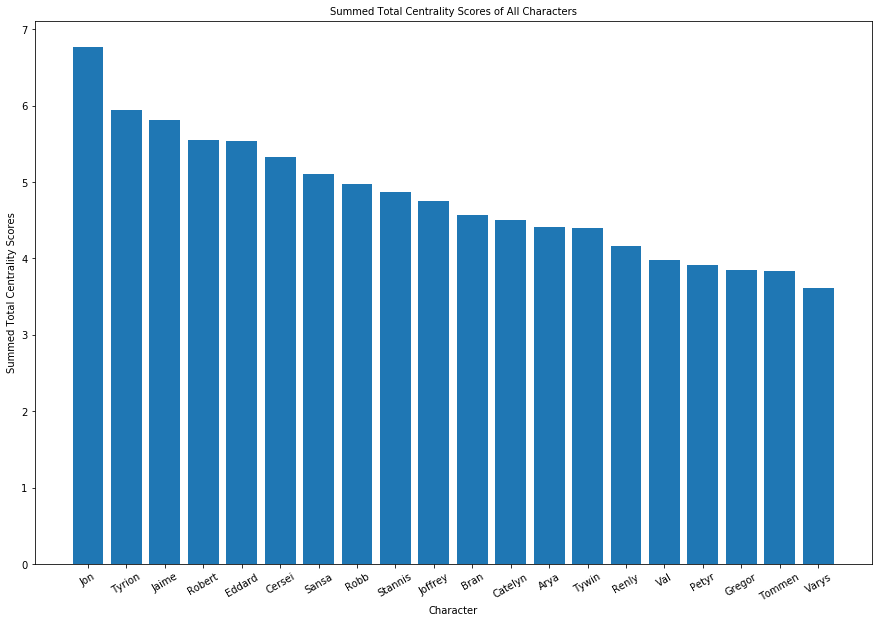

In [125]:
chars_tot=[]
for i in range(len(characters)):
    character_scores=[]
    for j in range(len(degc)):
        if(degc[j][0]==characters[i][0]):
            character_scores.append(degc[j][1])
    for j in range(len(degc_2)):
        if(degc_2[j][0]==characters[i][0]):
            character_scores.append(degc_2[j][1])
    for j in range(len(degc_3)):
        if(degc_3[j][0]==characters[i][0]):
            character_scores.append(degc_3[j][1])
    for j in range(len(degc_4)):
        if(degc_4[j][0]==characters[i][0]):
            character_scores.append(degc_4[j][1])
    for j in range(len(degc_5)):
        if(degc_5[j][0]==characters[i][0]):
            character_scores.append(degc_5[j][1])
    for j in range(len(betc)):
        if(betc[j][0]==characters[i][0]):
            character_scores.append(betc[j][1])
    for j in range(len(betc_2)):
        if(betc_2[j][0]==characters[i][0]):
            character_scores.append(betc_2[j][1])
    for j in range(len(betc_3)):
        if(betc_3[j][0]==characters[i][0]):
            character_scores.append(betc_3[j][1])
    for j in range(len(betc_4)):
        if(betc_4[j][0]==characters[i][0]):
            character_scores.append(betc_4[j][1])
    for j in range(len(betc_5)):
        if(betc_5[j][0]==characters[i][0]):
            character_scores.append(betc_5[j][1])
    for j in range(len(cloc)):
        if(cloc[j][0]==characters[i][0]):
            character_scores.append(cloc[j][1])
    for j in range(len(cloc_2)):
        if(cloc_2[j][0]==characters[i][0]):
            character_scores.append(cloc_2[j][1])
    for j in range(len(cloc_3)):
        if(cloc_3[j][0]==characters[i][0]):
            character_scores.append(cloc_3[j][1])
    for j in range(len(cloc_4)):
        if(cloc_4[j][0]==characters[i][0]):
            character_scores.append(cloc_4[j][1])
    for j in range(len(cloc_5)):
        if(cloc_5[j][0]==characters[i][0]):
            character_scores.append(cloc_5[j][1])
    for j in range(len(eigc)):
        if(eigc[j][0]==characters[i][0]):
            character_scores.append(eigc[j][1])
    for j in range(len(eigc_2)):
        if(eigc_2[j][0]==characters[i][0]):
            character_scores.append(eigc_2[j][1])
    for j in range(len(eigc_3)):
        if(eigc_3[j][0]==characters[i][0]):
            character_scores.append(eigc_3[j][1])
    for j in range(len(eigc_4)):
        if(eigc_4[j][0]==characters[i][0]):
            character_scores.append(eigc_4[j][1])
    for j in range(len(eigc_5)):
        if(eigc_5[j][0]==characters[i][0]):
            character_scores.append(eigc_5[j][1])
    
    samp=(characters[i][0],character_scores)
    chars_tot.append(samp)
chars_summed_tot=[]
for i in chars_tot:
    sum_val=sum(i[1])
    chars_2=(i[0],sum_val)
    chars_summed_tot.append(chars_2)
    
chars_summed_tot=sorted(chars_summed_tot, key=lambda x: x[1],reverse=True)
for i in range(10):
    print(chars_summed_tot[i])
    
labels=[]
vals=[]
    
for i in range(20):
    labels.append(chars_summed_tot[i][0])
    vals.append(chars_summed_tot[i][1])
    
index = np.arange(len(labels))
plt.figure(figsize=(15, 10))
plt.bar(index, vals)
plt.xlabel('Character', fontsize=10)
plt.ylabel('Summed Total Centrality Scores', fontsize=10)
plt.xticks(index, labels, fontsize=10, rotation=30)
plt.title('Summed Total Centrality Scores of All Characters',fontsize=10)
plt.show()

In [82]:
from networkx.algorithms.community import k_clique_communities 
c_1 = list(k_clique_communities(g, 4))
for community in c_1:
    print(community)
print("\n\n")
c_2 = list(k_clique_communities(g_2, 4))
for community in c_2:
    print(community)
print("\n\n")
c_3 = list(k_clique_communities(g_3, 4))
for community in c_3:
    print(community)
print("\n\n")
c_4 = list(k_clique_communities(g_4, 4))
for community in c_4:
    print(community)
print("\n\n")
c_5 = list(k_clique_communities(g_5, 4))
for community in c_5:
    print(community)

frozenset({'Rakharo', 'Irri', 'Viserys', 'Drogo', 'Daenerys', 'Doreah', 'Jorah'})
frozenset({'Arya', 'Mance', 'Thoros', 'Beric', 'Brandon', 'Val', 'Mordane', 'Walder', 'Tommen', 'Petyr', 'Stannis', 'Aemon', 'Rickon', 'Benjen', 'Rickard', 'Osha', 'Janos', 'Robb', 'Selmy', 'Hoster', 'Arryn', 'Meryn', 'Joffrey', 'Theon', 'Pycelle', 'Renly', 'Loras', 'Jaime', 'Shagga', 'Cersei', 'Sansa', 'Bronn', 'Roose', 'Bran', 'Arthur', 'Jon', 'Kevan', 'Rodrik', 'Robert', 'Aerys', 'Marillion', 'Catelyn', 'Jeor', 'Lancel', 'Sandor', 'Lysa', 'Yohn', 'Luwin', 'Varys', 'Lyanna', 'Gregor', 'Eddard', 'Tyrion', 'Edmure', 'Tywin', 'Timett', 'Syrio', 'Hodor', 'Brynden', 'Greatjon', 'Shae'})
frozenset({'Aemon', 'Jon', 'Pypar', 'Rast'})
frozenset({'Aemon', 'Jon', 'Bowen', 'Jeor'})



frozenset({'Arya', 'Brandon', 'Val', 'Jojen', 'Walder', 'Tommen', 'Petyr', 'Stannis', 'Rickon', 'Randyl', 'Doran', 'Rickard', 'Osha', 'Janos', 'Robb', 'Selmy', 'Arryn', 'Joffrey', 'Theon', 'Pycelle', 'Renly', 'Loras', 'Davos', 'Jaime'

# Link Prediction

In [66]:
# Constants
k = 5 # Top k recomendations for a target user (Used for testing model-accuracy metrics)
maxl = 2 # Number of iterations for Katz Algorithm (beta^maxl ~ 0)
beta = 0.1 # The damping factor for Katz Algorithm

In [67]:
def get_edge_list(dataset_path):
    data_file = open(dataset_path)
    edge_list = map(lambda x:tuple(map(int,x.split())),data_file.read().split("\n")[:-1])
    data_file.close()
    return edge_list

In [68]:
# Get the similarity product for a path
# (product of path-step similarities)
def get_sim_product(sim, shortest_path):
    prod = 1
    for i in range(len(shortest_path) - 1):
        prod *= sim[shortest_path[i]][shortest_path[i+1]]
    return round(prod,3)

In [69]:
# Filter out, Sort and Get top-K predictions
def get_top_k_recommendations(graph,sim,i,k):
    return sorted(filter(lambda x: i!=x and graph[i,x] != 1,range(len(sim[i]))) , key=lambda x: sim[i][x],reverse=True)[0:k]

In [70]:
# Convert edge_list into a set of constituent edges
def get_vertices_set(edge_list):
    res = set()
    for x,y in edge_list:
        res.add(x)
        res.add(y)
    return res

In [71]:
# Split the dataset into two parts (50-50 split)
# Create 2 graphs, 1 used for training and the other for testing
def split_data(edge_list):
    random.seed(350)
    indexes = range(len(list(edge_list)))
    test_indexes = set(random.sample(indexes, int(len(indexes)/1.05))) # removing 50% edges from test data
    train_indexes = set(indexes).difference(test_indexes)
    edge_list_1=list(edge_list)
    #print(edge_list_1)
    test_list = [edge_list_1[i] for i in test_indexes]
    train_list = [edge_list_1[i] for i in train_indexes]
    #print(train_list)
    #print("\n\n")
    #print(test_list)
    return train_list,test_list

In [72]:
# Calculates accuracy metrics (Precision & Recall),
# for a given similarity-model against a test-graph.
def print_precision_and_recall(sim,train_graph,test_graph,test_vertices_set,train_vertices_set):
    precision = recall = c = 0
    for i in test_vertices_set:
        if i in train_vertices_set:
            actual_friends_of_i = set(test_graph.neighbors(i))

            # Handles case where test-data < k
            if len(actual_friends_of_i) < k:
                k2 = len(actual_friends_of_i)
            else:
                k2 = k

            top_k = set(get_top_k_recommendations(train_graph,sim,i,k2))

            precision += len(top_k.intersection(actual_friends_of_i))/float(k2)
            recall += len(top_k.intersection(actual_friends_of_i))/float(len(actual_friends_of_i))
            c += 1
    print("Precision is : " + str(precision/c))
    print("Recall is : " + str(recall/c))

In [73]:
# http://be.amazd.com/link-prediction/
def similarity(graph, i, j, method):
    if method == "common_neighbors":
        return len(set(graph.neighbors(i)).intersection(set(graph.neighbors(j))))
    elif method == "jaccard":
        return len(set(graph.neighbors(i)).intersection(set(graph.neighbors(j))))/float(len(set(graph.neighbors(i)).union(set(graph.neighbors(j)))))
    elif method == "adamic_adar":
        return sum([1.0/math.log(graph.degree(v)) for v in set(graph.neighbors(i)).intersection(set(graph.neighbors(j)))])
    elif method == "preferential_attachment":
        return graph.degree(i) * graph.degree(j)
    elif method == "friendtns":
        return round((1.0/(graph.degree(i) + graph.degree(j) - 1.0)),3)

In [74]:
def local_methods(edge_list,method):
    train_list, test_list = split_data(edge_list)
    train_graph = Graph(train_list)
    test_graph = Graph(test_list)
    train_n =  train_graph.vcount() # This is maximum of the vertex id + 1
    train_vertices_set = get_vertices_set(train_list) # Need this because we have to only consider target users who are present in this train_vertices_set
    test_vertices_set = get_vertices_set(test_list) # Set of target users

    sim = [[0 for i in range(train_n)] for j in range(train_n)]
    for i in range(train_n):
        for j in range(train_n):
            if i!=j and i in train_vertices_set and j in train_vertices_set:
                sim[i][j] = similarity(train_graph,i,j,method)

    print_precision_and_recall(sim,train_graph,test_graph,test_vertices_set,train_vertices_set)

In [75]:
# Calculates the Katz Similarity measure for a node pair (i,j)
def katz_similarity(katzDict,i,j):
    l = 1
    neighbors = katzDict[i]
    score = 0

    while l <= maxl:
        numberOfPaths = neighbors.count(j)
        if numberOfPaths > 0:
            score += (beta**l)*numberOfPaths

        neighborsForNextLoop = []
        for k in neighbors:
            neighborsForNextLoop += katzDict[k]
        neighbors = neighborsForNextLoop
        l += 1

    return score

In [76]:
# Implementation of the Katz algorithm
def katz(edge_list):
    train_list, test_list = split_data(edge_list)
    train_graph = Graph(train_list)
    test_graph = Graph(test_list)
    train_n = train_graph.vcount()
    train_vertices_set = get_vertices_set(train_list) # Need this because we have to only consider target users who are present in this train_vertices_set
    test_vertices_set = get_vertices_set(test_list) # Set of target users

    # build a special dict that is like an adjacency list
    katzDict = {}
    adjList = train_graph.get_adjlist()

    for i, l in enumerate(adjList):
        katzDict[i] = l

    sim = [[0 for i in range(train_n)] for j in range(train_n)]
    for i in range(train_n):
        #print(i)
        if i not in train_vertices_set:
            continue

        for j in range(i+1, train_n):
            if j in train_vertices_set:
                sim[i][j] = sim[j][i] = katz_similarity(katzDict,i,j)

    print_precision_and_recall(sim,train_graph,test_graph,test_vertices_set,train_vertices_set)

In [77]:
# Implementation of the friendTNS algorithm
def friendtns(edge_list, method):
    train_list, test_list = split_data(edge_list)
    train_graph = Graph(train_list)
    test_graph = Graph(test_list)
    train_n =  train_graph.vcount() # This is maximum of the vertex id + 1
    train_vertices_set = get_vertices_set(train_list) # Need this because we have to only consider target users who are present in this train_vertices_set
    test_vertices_set = get_vertices_set(test_list) # Set of target users

    sim = [[0 for i in range(train_n)] for j in range(train_n)]
    for i in range(train_n):
        for j in range(train_n):
            if i!=j and i in train_vertices_set and j in train_vertices_set and train_graph[i,j] != 0:
                sim[i][j] = similarity(train_graph,i,j,method)


    # Calculate Shortest Paths from each vertex to every other vertex in the train_vertices_set
    sp = {}
    for i in train_vertices_set:
        sp[i] = train_graph.get_shortest_paths(i)

    # Extended Sim matrix
    esim = [[0 for i in range(train_n)] for j in range(train_n)]
    for i in range(train_n):
        for j in range(train_n):
            if i!=j and i in train_vertices_set and j in train_vertices_set:
                if len(sp[i][j]) == 0: # no path exists
                    esim[i][j] = 0
                elif train_graph[i,j] == 1 and train_graph[j,i] == 1: # are neighbors
                    esim[i][j] = sim[i][j]
                else:
                    esim[i][j] = get_sim_product(sim,sp[i][j])

    print_precision_and_recall(esim,train_graph,test_graph,test_vertices_set,train_vertices_set)

In [78]:
def get_preds(path,method):

    # Command line argument parsing
    #method = sys.argv[1].strip()
    #dataset_path = sys.argv[2].strip()
    edge_list = get_edge_list(path)
    edge_list=list(edge_list)
    #print(list(edge_list))
    if method == "common_neighbors" or method == "jaccard" or method == "adamic_adar" or method == "preferential_attachment":
        local_methods(edge_list,method)
    elif method == "katz":
        katz(edge_list)
    elif method == "friendtns":
        friendtns(edge_list,method)
    else:
        print("Invalid")

In [80]:
print("Common Neighbors")
get_preds("edge_list_unweighted.txt","common_neighbors")
print("\nJaccard")
get_preds("edge_list_unweighted.txt","jaccard")
print("\nAdamic Adar")
get_preds("edge_list_unweighted.txt","adamic_adar")
print("\nPreferential Attachment")
get_preds("edge_list_unweighted.txt","preferential_attachment")
print("\nKatz")
get_preds("edge_list_unweighted.txt","katz")
print("\nfriendTNS")
get_preds("edge_list_unweighted.txt","friendtns")

Common Neighbors
Precision is : 0.43499999999999994
Recall is : 0.12241669004296338

Jaccard
Precision is : 0.43499999999999994
Recall is : 0.12241669004296338

Adamic Adar
Precision is : 0.43499999999999994
Recall is : 0.12241669004296338

Preferential Attachment
Precision is : 0.5533333333333332
Recall is : 0.19421459879333394

Katz
Precision is : 0.43499999999999994
Recall is : 0.12241669004296338

friendTNS
Precision is : 0.3966666666666666
Recall is : 0.12427402103335887


C:\Users\Siddhanth\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: Couldn't reach some vertices at src\structural_properties.c:740
